In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
import csv

# Initialize an empty list to store the words
words_list = []

# Open the CSV file and read its contents
with open('../save_keywords/translated_keywords.csv', mode='r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        words_list.extend(row)

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Ruta al archivo CSV generado anteriormente con los vectores TF-IDF
tfidf_csv_path = '../document_vectorization/tfidf_vectors.csv'
data = pd.read_csv(tfidf_csv_path)

# Extract file names and vectors
file_names = data['File_Name']
tfidf_vectors = data.drop(columns=['File_Name']).values

In [10]:
file_names

0            100 Principios de Seguros
1                101 Analisis de Datos
2           102 Principios de Finanzas
3                    103 Coloquios adm
4            104 Finanzas Corporativas
                    ...               
181                       96 Evolucion
182         97 Principios de Marketing
183    98 Estadistica Empresarial +Lab
184              99 Gerencia de Costos
185            9 Cálculo Integral + Ej
Name: File_Name, Length: 186, dtype: object

In [27]:
# Step 2: Define and preprocess your query
query_text = "programacion para diseno y estructuras avanzada"
preprocessed_query = query_text.lower()  # Add your preprocessing steps here
# Step 3: Load the TF-IDF vectorizer used for the documents
vectorizer = TfidfVectorizer()  # Ensure this is consistent with your initial TF-IDF setup

# Fit the vectorizer to the document data
vectorizer.fit(data.drop(columns=['File_Name']).columns)

# Transform the query into a vector
query_vector = vectorizer.transform([preprocessed_query]).toarray()

In [34]:
# Step 4: Compute similarities (Cosine Similarity in this case)
similarities = cosine_similarity(query_vector, tfidf_vectors)[0]

# Step 5: Retrieve top 5 most similar files
top_5_indices = np.argsort(similarities)[::-1][:5]
top_5_files = file_names.iloc[top_5_indices]
top_5_scores = similarities[top_5_indices]

# Display the results
for i, (file, score) in enumerate(zip(top_5_files, top_5_scores), start=1):
    print(f"Rank {i}: {file} with similarity score {score:.4f}")

Rank 1: 144 Programacion Para Diseño 2 with similarity score 0.5464
Rank 2: 145 Programacion Para Diseño 3 with similarity score 0.5357
Rank 3: 143 Programacion Para Diseño 1 with similarity score 0.5322
Rank 4: 14 Programacion Avanzada en C++ with similarity score 0.3107
Rank 5: 121 Dibujo para Arte y Diseno with similarity score 0.2727


In [29]:
from sklearn.metrics.pairwise import euclidean_distances

# Compute Euclidean distances
euclidean_dist = euclidean_distances(query_vector, tfidf_vectors)[0]

# Retrieve top 5 most similar files based on Euclidean distance (smallest distance)
top_5_indices_euclidean = np.argsort(euclidean_dist)[:5]
top_5_files_euclidean = file_names.iloc[top_5_indices_euclidean]
top_5_scores_euclidean = euclidean_dist[top_5_indices_euclidean]

# Display the results
for i, (file, score) in enumerate(zip(top_5_files_euclidean, top_5_scores_euclidean), start=1):
    print(f"Rank {i}: {file} with Euclidean distance {score:.4f}")

Rank 1: 144 Programacion Para Diseño 2 with Euclidean distance 0.9525
Rank 2: 145 Programacion Para Diseño 3 with Euclidean distance 0.9637
Rank 3: 143 Programacion Para Diseño 1 with Euclidean distance 0.9673
Rank 4: 14 Programacion Avanzada en C++ with Euclidean distance 1.1741
Rank 5: 121 Dibujo para Arte y Diseno with Euclidean distance 1.2061


In [30]:
from sklearn.metrics import jaccard_score

# Convert TF-IDF vectors to binary vectors
binary_tfidf_vectors = (tfidf_vectors > 0).astype(int)
binary_query_vector = (query_vector > 0).astype(int)

# Compute Jaccard similarities
jaccard_similarities = []
for vec in binary_tfidf_vectors:
    jaccard_similarities.append(jaccard_score(binary_query_vector[0], vec))

jaccard_similarities = np.array(jaccard_similarities)

# Retrieve top 5 most similar files based on Jaccard similarity
top_5_indices_jaccard = np.argsort(jaccard_similarities)[::-1][:5]
top_5_files_jaccard = file_names.iloc[top_5_indices_jaccard]
top_5_scores_jaccard = jaccard_similarities[top_5_indices_jaccard]

# Display the results
for i, (file, score) in enumerate(zip(top_5_files_jaccard, top_5_scores_jaccard), start=1):
    print(f"Rank {i}: {file} with Jaccard similarity score {score:.4f}")

Rank 1: 143 Programacion Para Diseño 1 with Jaccard similarity score 0.0870
Rank 2: 145 Programacion Para Diseño 3 with Jaccard similarity score 0.0769
Rank 3: 144 Programacion Para Diseño 2 with Jaccard similarity score 0.0741
Rank 4: 121 Dibujo para Arte y Diseno with Jaccard similarity score 0.0667
Rank 5: 14 Programacion Avanzada en C++ with Jaccard similarity score 0.0526


In [39]:
from scipy.stats import pearsonr

# Compute Pearson correlations
pearson_correlations = []
for vec in tfidf_vectors:
    corr, _ = pearsonr(query_vector[0], vec)
    pearson_correlations.append(corr)

pearson_correlations = np.array(pearson_correlations)

# Retrieve top 5 most similar files based on Pearson correlation
top_5_indices_pearson = np.argsort(pearson_correlations)[::-1][:5]
top_5_files_pearson = file_names.iloc[top_5_indices_pearson]
top_5_scores_pearson = pearson_correlations[top_5_indices_pearson]

# Display the results
for i, (file, score) in enumerate(zip(top_5_files_pearson, top_5_scores_pearson), start=1):
    print(f"Rank {i}: {file} with Pearson correlation score {score:.4f}")

Rank 1: 144 Programacion Para Diseño 2 with Pearson correlation score 0.5464
Rank 2: 145 Programacion Para Diseño 3 with Pearson correlation score 0.5355
Rank 3: 143 Programacion Para Diseño 1 with Pearson correlation score 0.5316
Rank 4: 14 Programacion Avanzada en C++ with Pearson correlation score 0.3083
Rank 5: 121 Dibujo para Arte y Diseno with Pearson correlation score 0.2702


In [32]:
from sklearn.metrics.pairwise import manhattan_distances

# Compute Manhattan distances
manhattan_dist = manhattan_distances(query_vector, tfidf_vectors)[0]

# Retrieve top 5 most similar files based on Manhattan distance (smallest distance)
top_5_indices_manhattan = np.argsort(manhattan_dist)[:5]
top_5_files_manhattan = file_names.iloc[top_5_indices_manhattan]
top_5_scores_manhattan = manhattan_dist[top_5_indices_manhattan]

# Display the results
for i, (file, score) in enumerate(zip(top_5_files_manhattan, top_5_scores_manhattan), start=1):
    print(f"Rank {i}: {file} with Manhattan distance {score:.4f}")

Rank 1: 121 Dibujo para Arte y Diseno with Manhattan distance 3.9281
Rank 2: 143 Programacion Para Diseño 1 with Manhattan distance 4.1343
Rank 3: 119 Composicion Visual 1 with Manhattan distance 4.4812
Rank 4: 14 Programacion Avanzada en C++ with Manhattan distance 4.5419
Rank 5: 144 Programacion Para Diseño 2 with Manhattan distance 4.5846


In [35]:
from scipy.stats import entropy

# Compute KL divergence
kl_divergences = []
for vec in tfidf_vectors:
    kl_div = entropy(query_vector[0], vec)
    kl_divergences.append(kl_div)

kl_divergences = np.array(kl_divergences)

# Retrieve top 5 most similar files based on KL divergence (smallest divergence)
top_5_indices_kl = np.argsort(kl_divergences)[:5]
top_5_files_kl = file_names.iloc[top_5_indices_kl]
top_5_scores_kl = kl_divergences[top_5_indices_kl]

# Display the results
for i, (file, score) in enumerate(zip(top_5_files_kl, top_5_scores_kl), start=1):
    print(f"Rank {i}: {file} with KL divergence {score:.4f}")

Rank 1: 145 Programacion Para Diseño 3 with KL divergence 1.8352
Rank 2: 144 Programacion Para Diseño 2 with KL divergence 1.8415
Rank 3: 143 Programacion Para Diseño 1 with KL divergence 1.8975
Rank 4: 55 Administracion de A & B with KL divergence inf
Rank 5: 3 Cálculo Diferencial + Ej with KL divergence inf


In [36]:
from scipy.spatial.distance import hamming

# Compute Hamming distances
hamming_distances = []
for vec in binary_tfidf_vectors:
    hamming_distances.append(hamming(binary_query_vector[0], vec))

hamming_distances = np.array(hamming_distances)

# Retrieve top 5 most similar files based on Hamming distance (smallest distance)
top_5_indices_hamming = np.argsort(hamming_distances)[:5]
top_5_files_hamming = file_names.iloc[top_5_indices_hamming]
top_5_scores_hamming = hamming_distances[top_5_indices_hamming]

# Display the results
for i, (file, score) in enumerate(zip(top_5_files_hamming, top_5_scores_hamming), start=1):
    print(f"Rank {i}: {file} with Hamming distance {score:.4f}")

Rank 1: 121 Dibujo para Arte y Diseno with Hamming distance 0.0119
Rank 2: 119 Composicion Visual 1 with Hamming distance 0.0119
Rank 3: 130 Arte y Contexto Social with Hamming distance 0.0119
Rank 4: 124 Teoria Critica 1  Arte & Media with Hamming distance 0.0127
Rank 5: 108 Economia y Negocios with Hamming distance 0.0127


In [41]:
import numpy as np

# Define Bhattacharyya distance function
def bhattacharyya(p, q):
    return -np.log(np.sum(np.sqrt(p * q)))

# Compute Bhattacharyya distances
bhattacharyya_distances = []
for vec in tfidf_vectors:
    bhattacharyya_distances.append(bhattacharyya(query_vector[0], vec))

bhattacharyya_distances = np.array(bhattacharyya_distances)

# Retrieve top 5 most similar files based on Bhattacharyya distance (smallest distance)
top_5_indices_bhattacharyya = np.argsort(bhattacharyya_distances)[:5]
top_5_files_bhattacharyya = file_names.iloc[top_5_indices_bhattacharyya]
top_5_scores_bhattacharyya = bhattacharyya_distances[top_5_indices_bhattacharyya]

# Display the results
for i, (file, score) in enumerate(zip(top_5_files_bhattacharyya, top_5_scores_bhattacharyya), start=1):
    print(f"Rank {i}: {file} with Bhattacharyya distance {score:.4f}")

Rank 1: 144 Programacion Para Diseño 2 with Bhattacharyya distance -0.0362
Rank 2: 145 Programacion Para Diseño 3 with Bhattacharyya distance -0.0317
Rank 3: 143 Programacion Para Diseño 1 with Bhattacharyya distance 0.0100
Rank 4: 14 Programacion Avanzada en C++ with Bhattacharyya distance 0.5844
Rank 5: 121 Dibujo para Arte y Diseno with Bhattacharyya distance 0.6497


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


In [44]:
# Compute dot product
dot_products = np.dot(tfidf_vectors, query_vector.T).flatten()

# Retrieve top 5 most similar files based on dot product
top_5_indices_dot = np.argsort(dot_products)[::-1][:5]
top_5_files_dot = file_names.iloc[top_5_indices_dot]
top_5_scores_dot = dot_products[top_5_indices_dot]

# Display the results
for i, (file, score) in enumerate(zip(top_5_files_dot, top_5_scores_dot), start=1):
    print(f"Rank {i}: {file} with dot product score {score:.4f}")

Rank 1: 144 Programacion Para Diseño 2 with dot product score 0.5464
Rank 2: 145 Programacion Para Diseño 3 with dot product score 0.5357
Rank 3: 143 Programacion Para Diseño 1 with dot product score 0.5322
Rank 4: 14 Programacion Avanzada en C++ with dot product score 0.3107
Rank 5: 121 Dibujo para Arte y Diseno with dot product score 0.2727


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 144 Programacion Para Diseño 2 with similarity score 0.5464
Rank 2: 145 Programacion Para Diseño 3 with similarity score 0.5357
Rank 3: 143 Programacion Para Diseño 1 with similarity score 0.5322
Rank 4: 14 Programacion Avanzada en C++ with similarity score 0.3107
Rank 5: 121 Dibujo para Arte y Diseno with similarity score 0.2727

Euclidean Distance:
Rank 1: 144 Programacion Para Diseño 2 with distance 0.9525
Rank 2: 145 Programacion Para Diseño 3 with distance 0.9637
Rank 3: 143 Programacion Para Diseño 1 with distance 0.9673
Rank 4: 14 Programacion Avanzada en C++ with distance 1.1741
Rank 5: 121 Dibujo para Arte y Diseno with distance 1.2061

Jaccard Similarity:
Rank 1: 143 Programacion Para Diseño 1 with similarity score 0.0870
Rank 2: 145 Programacion Para Diseño 3 with similarity score 0.0769
Rank 3: 144 Programacion Para Diseño 2 with similarity score 0.0741
Rank 4: 121 Dibujo para Arte y Diseno with similarity s

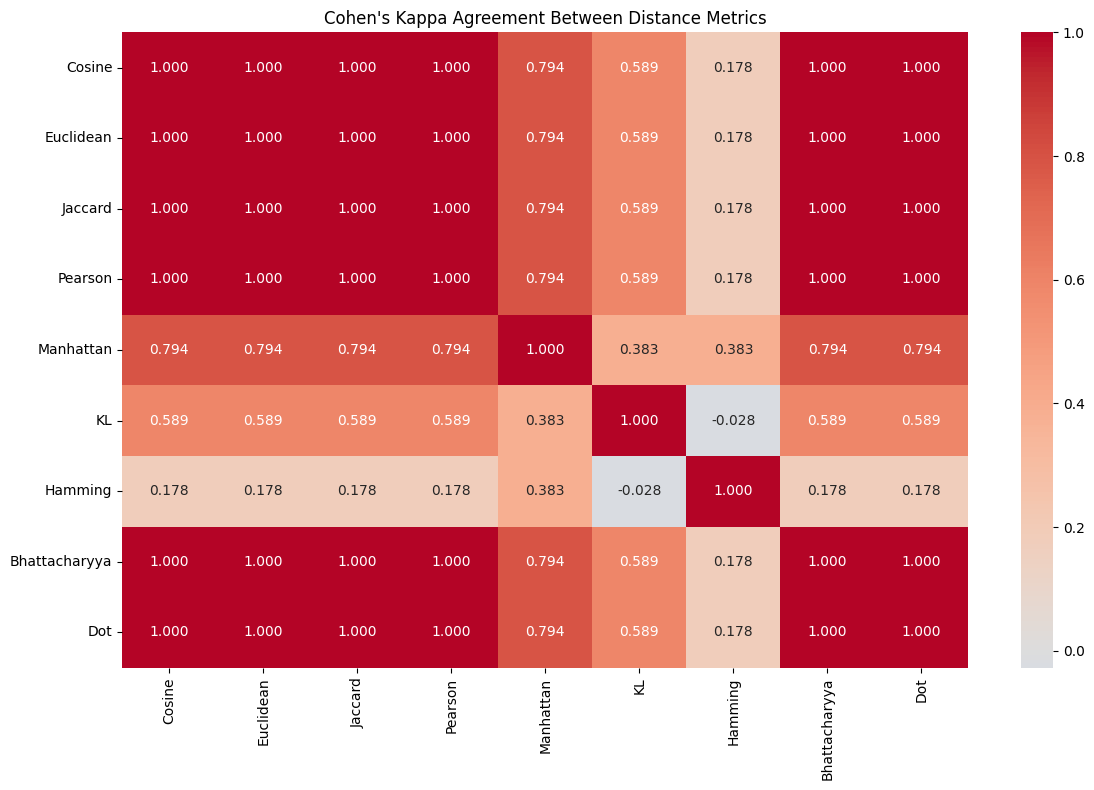

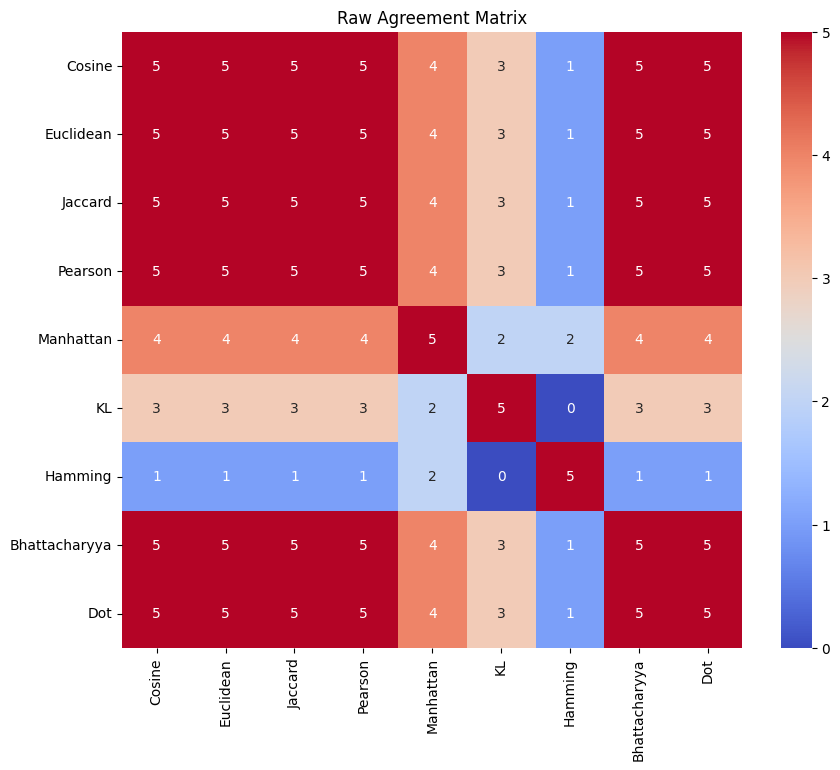

{'Cosine': {'indices': array([48, 49, 47, 54, 23], dtype=int64),
  'scores': array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.15184263, 0.        ,
         0.        , 0.        , 0.        , 0.27268893, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.532168  , 0.54637506, 0.53566602,
         0.        , 0.12262913, 0.        , 0.        , 0.31072772,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.     

In [71]:
def compare_distances(query_vector, num_results):
    # Store all indices and scores in a dictionary for easier comparison
    all_results = {
        'Cosine': {'indices': None, 'scores': None},
        'Euclidean': {'indices': None, 'scores': None},
        'Jaccard': {'indices': None, 'scores': None},
        'Pearson': {'indices': None, 'scores': None},
        'Manhattan': {'indices': None, 'scores': None},
        'KL': {'indices': None, 'scores': None},
        'Hamming': {'indices': None, 'scores': None},
        'Bhattacharyya': {'indices': None, 'scores': None},
        'Dot': {'indices': None, 'scores': None}
    }

    # Compute similarities (Cosine Similarity)
    similarities = cosine_similarity(query_vector, tfidf_vectors)[0]
    top_5_indices_cosine = np.argsort(similarities)[::-1][:num_results]
    all_results['Cosine']['indices'] = top_5_indices_cosine
    all_results['Cosine']['scores'] = similarities
    top_5_files_cosine = file_names.iloc[top_5_indices_cosine]
    top_5_scores_cosine = similarities[top_5_indices_cosine]

    # Compute Euclidean distances
    euclidean_dist = euclidean_distances(query_vector, tfidf_vectors)[0]
    top_5_indices_euclidean = np.argsort(euclidean_dist)[:num_results]
    all_results['Euclidean']['indices'] = top_5_indices_euclidean
    all_results['Euclidean']['scores'] = euclidean_dist
    top_5_files_euclidean = file_names.iloc[top_5_indices_euclidean]
    top_5_scores_euclidean = euclidean_dist[top_5_indices_euclidean]

    # Compute Jaccard similarities
    binary_query_vector = (query_vector > 0).astype(int)
    jaccard_similarities = []
    for vec in binary_tfidf_vectors:
        jaccard_similarities.append(jaccard_score(binary_query_vector[0], vec))
    jaccard_similarities = np.array(jaccard_similarities)
    top_5_indices_jaccard = np.argsort(jaccard_similarities)[::-1][:num_results]
    all_results['Jaccard']['indices'] = top_5_indices_jaccard
    all_results['Jaccard']['scores'] = jaccard_similarities
    top_5_files_jaccard = file_names.iloc[top_5_indices_jaccard]
    top_5_scores_jaccard = jaccard_similarities[top_5_indices_jaccard]

    # Compute Pearson correlations
    pearson_correlations = []
    for vec in tfidf_vectors:
        corr, _ = pearsonr(query_vector[0], vec)
        pearson_correlations.append(corr)
    pearson_correlations = np.array(pearson_correlations)
    top_5_indices_pearson = np.argsort(pearson_correlations)[::-1][:num_results]
    all_results['Pearson']['indices'] = top_5_indices_pearson
    all_results['Pearson']['scores'] = pearson_correlations
    top_5_files_pearson = file_names.iloc[top_5_indices_pearson]
    top_5_scores_pearson = pearson_correlations[top_5_indices_pearson]

    # Compute Manhattan distances
    manhattan_dist = manhattan_distances(query_vector, tfidf_vectors)[0]
    top_5_indices_manhattan = np.argsort(manhattan_dist)[:num_results]
    all_results['Manhattan']['indices'] = top_5_indices_manhattan
    all_results['Manhattan']['scores'] = manhattan_dist
    top_5_files_manhattan = file_names.iloc[top_5_indices_manhattan]
    top_5_scores_manhattan = manhattan_dist[top_5_indices_manhattan]

    # Compute KL divergence
    kl_divergences = []
    for vec in tfidf_vectors:
        kl_div = entropy(query_vector[0], vec)
        kl_divergences.append(kl_div)
    kl_divergences = np.array(kl_divergences)
    top_5_indices_kl = np.argsort(kl_divergences)[:num_results]
    all_results['KL']['indices'] = top_5_indices_kl
    all_results['KL']['scores'] = kl_divergences
    top_5_files_kl = file_names.iloc[top_5_indices_kl]
    top_5_scores_kl = kl_divergences[top_5_indices_kl]

    # Compute Hamming distances
    hamming_distances = []
    for vec in binary_tfidf_vectors:
        hamming_distances.append(hamming(binary_query_vector[0], vec))
    hamming_distances = np.array(hamming_distances)
    top_5_indices_hamming = np.argsort(hamming_distances)[:num_results]
    all_results['Hamming']['indices'] = top_5_indices_hamming
    all_results['Hamming']['scores'] = hamming_distances
    top_5_files_hamming = file_names.iloc[top_5_indices_hamming]
    top_5_scores_hamming = hamming_distances[top_5_indices_hamming]

    # Compute Bhattacharyya distances
    bhattacharyya_distances = []
    for vec in tfidf_vectors:
        bhattacharyya_distances.append(bhattacharyya(query_vector[0], vec))
    bhattacharyya_distances = np.array(bhattacharyya_distances)
    top_5_indices_bhattacharyya = np.argsort(bhattacharyya_distances)[:num_results]
    all_results['Bhattacharyya']['indices'] = top_5_indices_bhattacharyya
    all_results['Bhattacharyya']['scores'] = bhattacharyya_distances
    top_5_files_bhattacharyya = file_names.iloc[top_5_indices_bhattacharyya]
    top_5_scores_bhattacharyya = bhattacharyya_distances[top_5_indices_bhattacharyya]

    # Compute dot product
    dot_products = np.dot(tfidf_vectors, query_vector.T).flatten()
    top_5_indices_dot = np.argsort(dot_products)[::-1][:num_results]
    all_results['Dot']['indices'] = top_5_indices_dot
    all_results['Dot']['scores'] = dot_products
    top_5_files_dot = file_names.iloc[top_5_indices_dot]
    top_5_scores_dot = dot_products[top_5_indices_dot]

    # Calculate Cohen's Kappa agreement matrix
    n_metrics = len(all_results)
    metric_names = list(all_results.keys())
    kappa_matrix = np.zeros((n_metrics, n_metrics))
    
    # Create binary labels for all documents (1 if in top 5, 0 otherwise)
    n_docs = len(file_names)
    binary_rankings = {}
    for metric, data in all_results.items():
        binary_rankings[metric] = np.zeros(n_docs)
        binary_rankings[metric][data['indices']] = 1
    
    # Calculate Cohen's Kappa for each pair of metrics
    for i, metric1 in enumerate(metric_names):
        for j, metric2 in enumerate(metric_names):
            kappa = cohen_kappa_score(
                binary_rankings[metric1],
                binary_rankings[metric2]
            )
            kappa_matrix[i, j] = kappa

    # Compute raw agreement matrix
    metrics = list(all_results.keys())
    agreement_matrix = np.zeros((len(metrics), len(metrics)))

    for i, metric1 in enumerate(metrics):
        for j, metric2 in enumerate(metrics):
            if i <= j:
                indices1 = set(all_results[metric1]['indices'])
                indices2 = set(all_results[metric2]['indices'])
                agreement_matrix[i, j] = len(indices1.intersection(indices2))
                agreement_matrix[j, i] = agreement_matrix[i, j]

    # Print original results
    print("=== Top 5 Rankings for Each Metric ===\n")
    
    print("Cosine Similarity:")
    for i, (file, score) in enumerate(zip(top_5_files_cosine, top_5_scores_cosine), start=1):
        print(f"Rank {i}: {file} with similarity score {score:.4f}")

    print("\nEuclidean Distance:")
    for i, (file, score) in enumerate(zip(top_5_files_euclidean, top_5_scores_euclidean), start=1):
        print(f"Rank {i}: {file} with distance {score:.4f}")

    print("\nJaccard Similarity:")
    for i, (file, score) in enumerate(zip(top_5_files_jaccard, top_5_scores_jaccard), start=1):
        print(f"Rank {i}: {file} with similarity score {score:.4f}")

    print("\nPearson Correlation:")
    for i, (file, score) in enumerate(zip(top_5_files_pearson, top_5_scores_pearson), start=1):
        print(f"Rank {i}: {file} with correlation score {score:.4f}")

    print("\nManhattan Distance:")
    for i, (file, score) in enumerate(zip(top_5_files_manhattan, top_5_scores_manhattan), start=1):
        print(f"Rank {i}: {file} with distance {score:.4f}")

    print("\nKL Divergence:")
    for i, (file, score) in enumerate(zip(top_5_files_kl, top_5_scores_kl), start=1):
        print(f"Rank {i}: {file} with divergence {score:.4f}")

    print("\nHamming Distance:")
    for i, (file, score) in enumerate(zip(top_5_files_hamming, top_5_scores_hamming), start=1):
        print(f"Rank {i}: {file} with distance {score:.4f}")

    print("\nBhattacharyya Distance:")
    for i, (file, score) in enumerate(zip(top_5_files_bhattacharyya, top_5_scores_bhattacharyya), start=1):
        print(f"Rank {i}: {file} with distance {score:.4f}")

    print("\nDot Product:")
    for i, (file, score) in enumerate(zip(top_5_files_dot, top_5_scores_dot), start=1):
        print(f"Rank {i}: {file} with dot product score {score:.4f}")

    # Print Cohen's Kappa agreement matrix
    print("\n=== Cohen's Kappa Agreement Matrix ===")
    print("(Values range from -1 to 1, where 1 indicates perfect agreement)")
    print("\nMetric", end="")
    for metric in metric_names:
        print(f"\t{metric[:4]}", end="")
    print()
    
    for i, metric1 in enumerate(metric_names):
        print(f"{metric1[:4]}", end="")
        for j, metric2 in enumerate(metric_names):
            print(f"\t{kappa_matrix[i,j]:.3f}", end="")
        print()

    # Create heatmap visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(kappa_matrix, 
                xticklabels=metric_names,
                yticklabels=metric_names,
                annot=True,
                fmt='.3f',
                cmap='coolwarm',
                center=0)
    plt.title("Cohen's Kappa Agreement Between Distance Metrics")
    plt.tight_layout()
    plt.show()

    # Plot raw agreement matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(agreement_matrix, annot=True, xticklabels=metrics, yticklabels=metrics, cmap='coolwarm')
    plt.title('Raw Agreement Matrix')
    plt.show()

    return all_results


# Example usage
compare_distances(query_vector, 5)

**************************1********************************
Random Query: disciplina tecnica explorar filme biologia


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 138 Enfasis 3 with similarity score 0.2273
Rank 2: 58 Introduccion a la Biología +Ej with similarity score 0.1765
Rank 3: 156 Inferencia Estadística with similarity score 0.1693
Rank 4: 123 Fundamentos de Escultura with similarity score 0.1648
Rank 5: 57 Alta Cocina Ecuatoriana with similarity score 0.1556

Euclidean Distance:
Rank 1: 138 Enfasis 3 with distance 1.2431
Rank 2: 58 Introduccion a la Biología +Ej with distance 1.2834
Rank 3: 156 Inferencia Estadística with distance 1.2890
Rank 4: 123 Fundamentos de Escultura with distance 1.2925
Rank 5: 57 Alta Cocina Ecuatoriana with distance 1.2996

Jaccard Similarity:
Rank 1: 123 Fundamentos de Escultura with similarity score 0.1250
Rank 2: 138 Enfasis 3 with similarity score 0.1176
Rank 3: 147 Modelado 3D 1 with similarity score 0.0870
Rank 4: 169 Improvisacion with similarity score 0.0870
Rank 5: 151 Ecuaciones Diferenciales with similarity score 0.0870

Pearson Corre

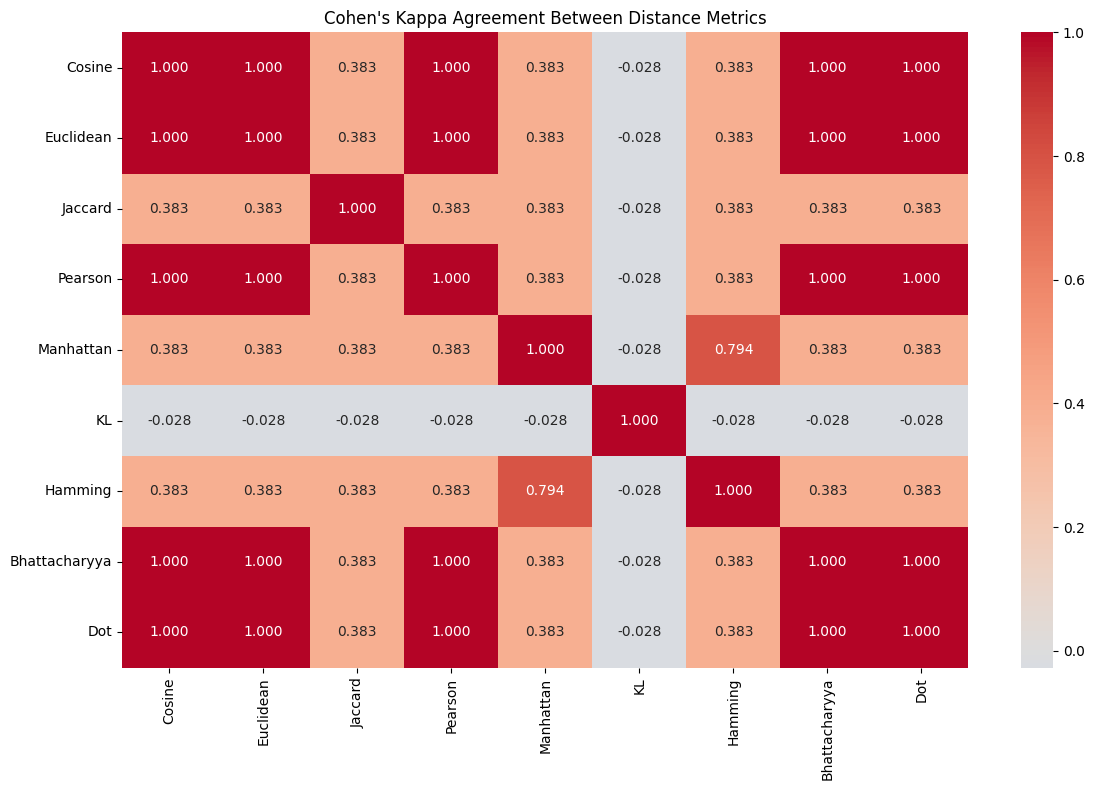

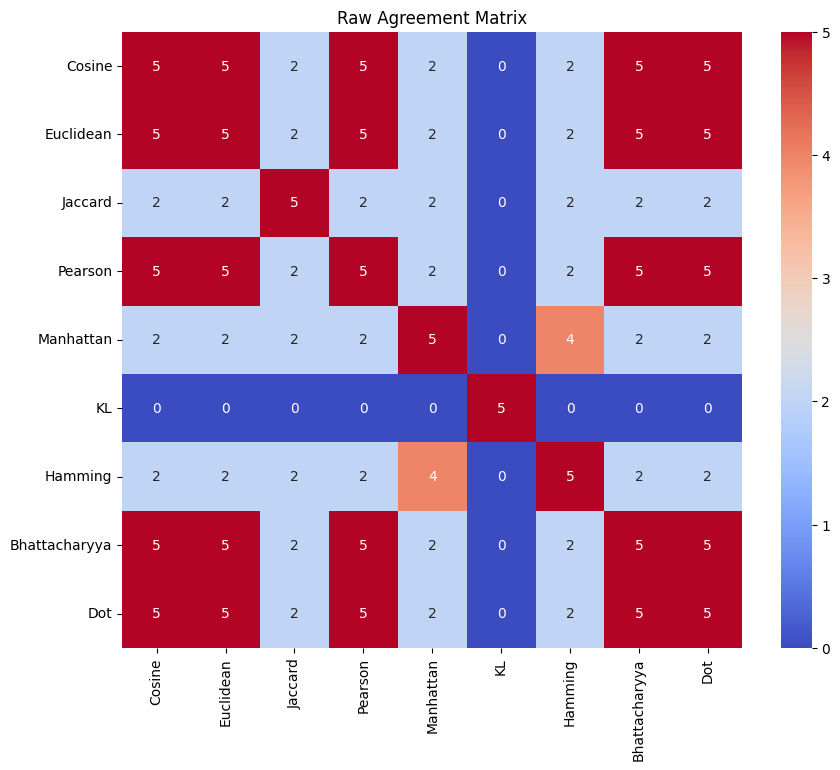

**************************2********************************
Random Query: optimizacion hospitalidad practico cultural pedagogico


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 135 Gestion y Produccion Cultural with similarity score 0.2473
Rank 2: 51 Introduccion a la Hospitalidad with similarity score 0.1955
Rank 3: 91 Inclusion y Diversidad with similarity score 0.1874
Rank 4: 181 Inv. de Operaciones 1 +Lab with similarity score 0.1772
Rank 5: 3 Cálculo Diferencial + Ej with similarity score 0.1576

Euclidean Distance:
Rank 1: 135 Gestion y Produccion Cultural with distance 1.2269
Rank 2: 51 Introduccion a la Hospitalidad with distance 1.2684
Rank 3: 91 Inclusion y Diversidad with distance 1.2748
Rank 4: 181 Inv. de Operaciones 1 +Lab with distance 1.2828
Rank 5: 3 Cálculo Diferencial + Ej with distance 1.2980

Jaccard Similarity:
Rank 1: 3 Cálculo Diferencial + Ej with similarity score 0.0870
Rank 2: 181 Inv. de Operaciones 1 +Lab with similarity score 0.0741
Rank 3: 35 Base de Datos with similarity score 0.0645
Rank 4: 59 Introduccion al Marketing HSP with similarity score 0.0645
Rank 5: 9

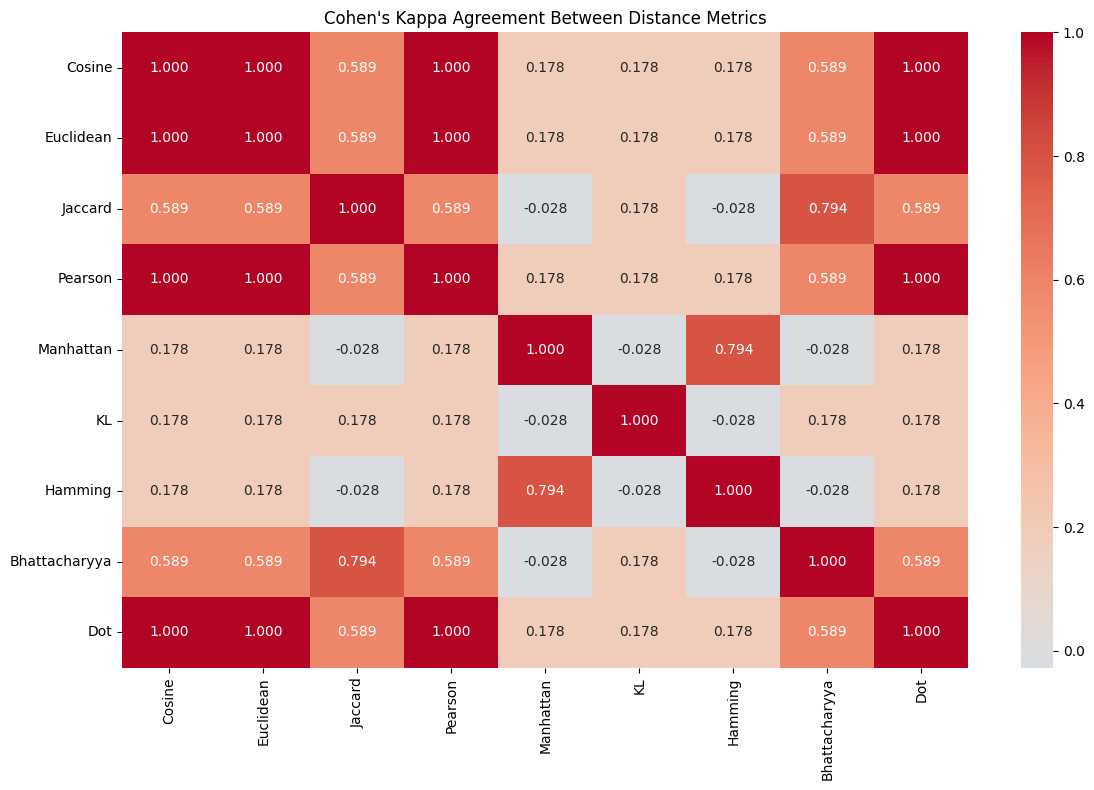

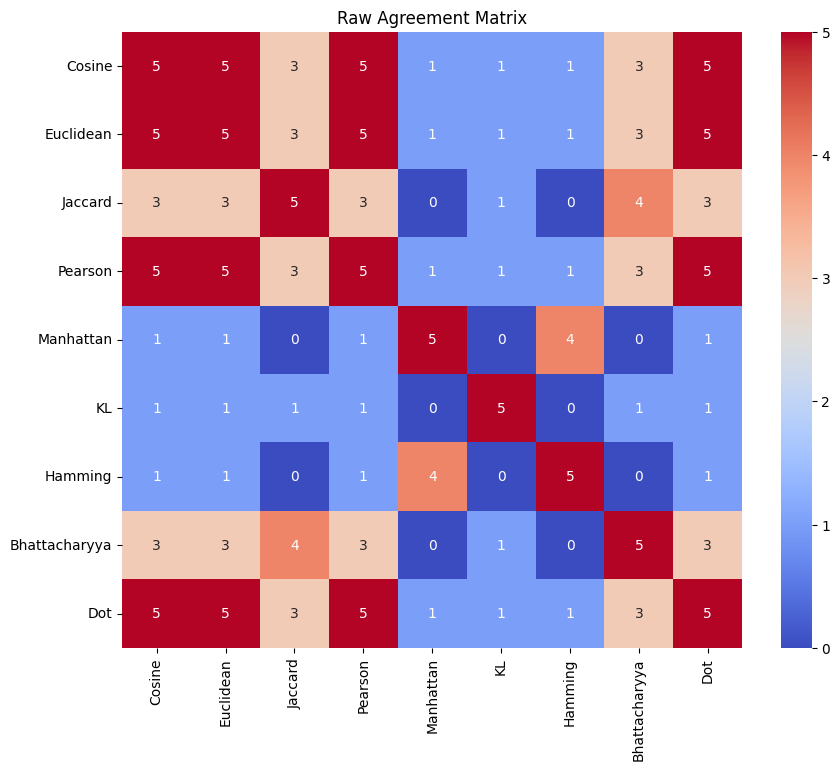

**************************3********************************
Random Query: algebra seguridad competitivo social negocio


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 130 Arte y Contexto Social with similarity score 0.2103
Rank 2: 42 Seguridad Informática with similarity score 0.2078
Rank 3: 24 Aprendizaje y Servicio PASEC with similarity score 0.1557
Rank 4: 103 Coloquios adm with similarity score 0.1489
Rank 5: 116 Analisis Estrategico ADM with similarity score 0.1483

Euclidean Distance:
Rank 1: 130 Arte y Contexto Social with distance 1.2567
Rank 2: 42 Seguridad Informática with distance 1.2587
Rank 3: 24 Aprendizaje y Servicio PASEC with distance 1.2995
Rank 4: 103 Coloquios adm with distance 1.3047
Rank 5: 116 Analisis Estrategico ADM with distance 1.3051

Jaccard Similarity:
Rank 1: 130 Arte y Contexto Social with similarity score 0.0625
Rank 2: 103 Coloquios adm with similarity score 0.0556
Rank 3: 114 Innovacion y Sustentabilidad with similarity score 0.0556
Rank 4: 116 Analisis Estrategico ADM with similarity score 0.0526
Rank 5: 113 Negocios Internacionales with similarity

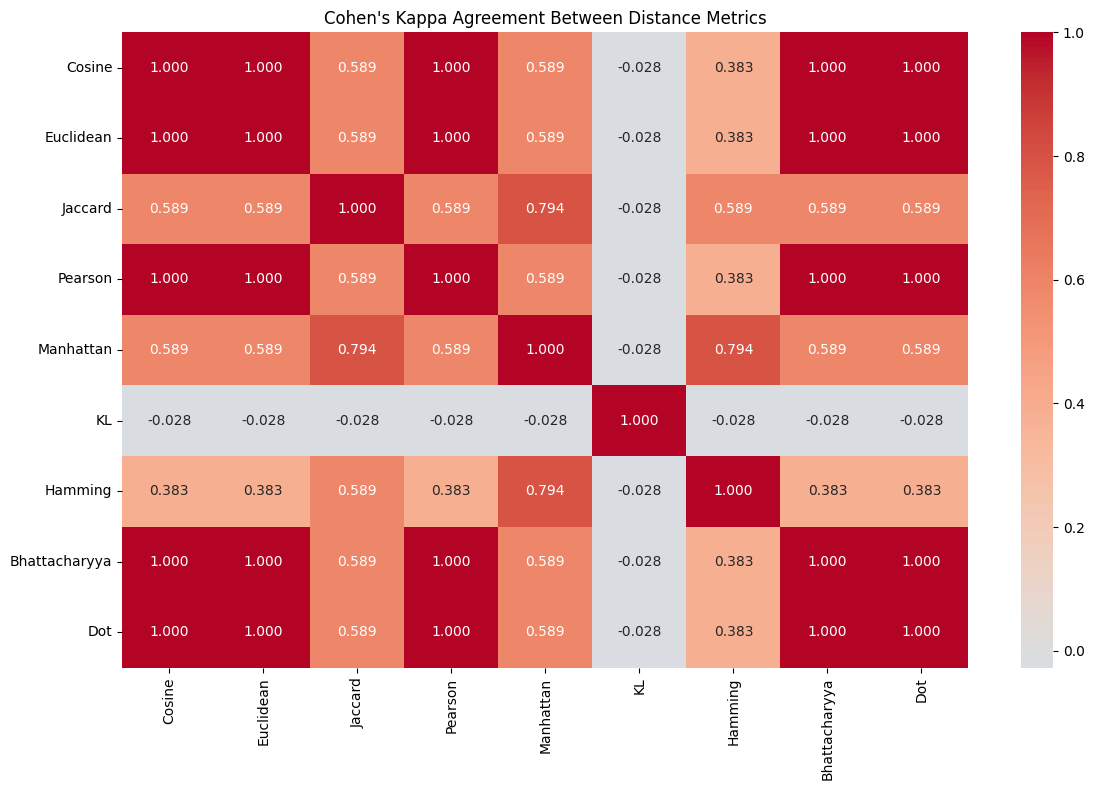

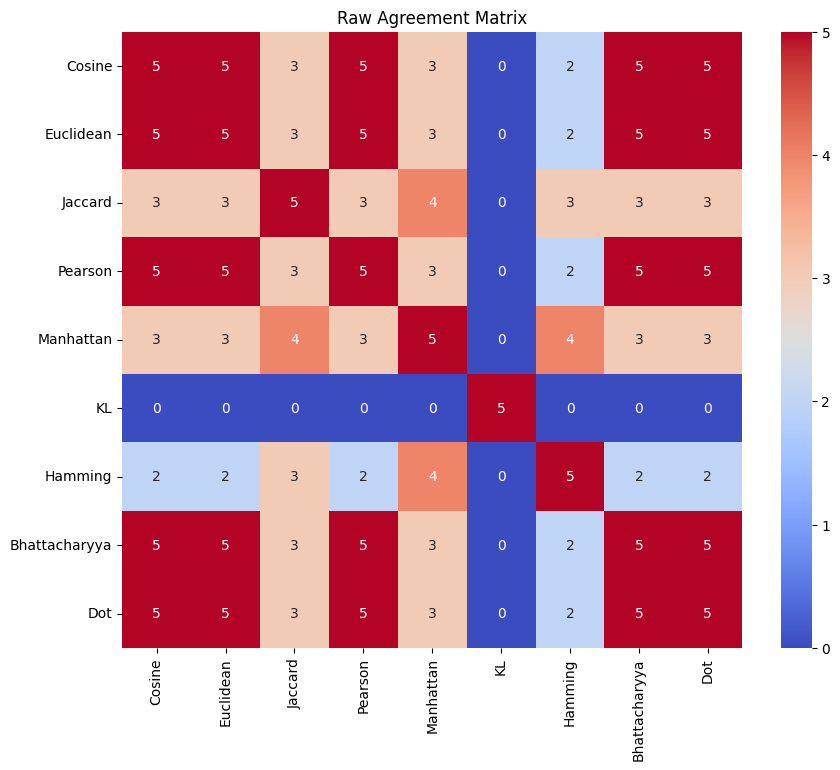

**************************4********************************
Random Query: ensenanza arte multimedia marketing ciencia


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 125 Nuevos Medios with similarity score 0.3205
Rank 2: 105 Marketing Digital with similarity score 0.2795
Rank 3: 88 Ensenanza de Ciencias with similarity score 0.2604
Rank 4: 117 Herramientas Digitales 1 with similarity score 0.2231
Rank 5: 141 Temas en Comunicacion y Arte with similarity score 0.1957

Euclidean Distance:
Rank 1: 125 Nuevos Medios with distance 1.1658
Rank 2: 105 Marketing Digital with distance 1.2004
Rank 3: 88 Ensenanza de Ciencias with distance 1.2162
Rank 4: 117 Herramientas Digitales 1 with distance 1.2465
Rank 5: 141 Temas en Comunicacion y Arte with distance 1.2683

Jaccard Similarity:
Rank 1: 125 Nuevos Medios with similarity score 0.1176
Rank 2: 117 Herramientas Digitales 1 with similarity score 0.0952
Rank 3: 88 Ensenanza de Ciencias with similarity score 0.0667
Rank 4: 119 Composicion Visual 1 with similarity score 0.0625
Rank 5: 130 Arte y Contexto Social with similarity score 0.0625

Pears

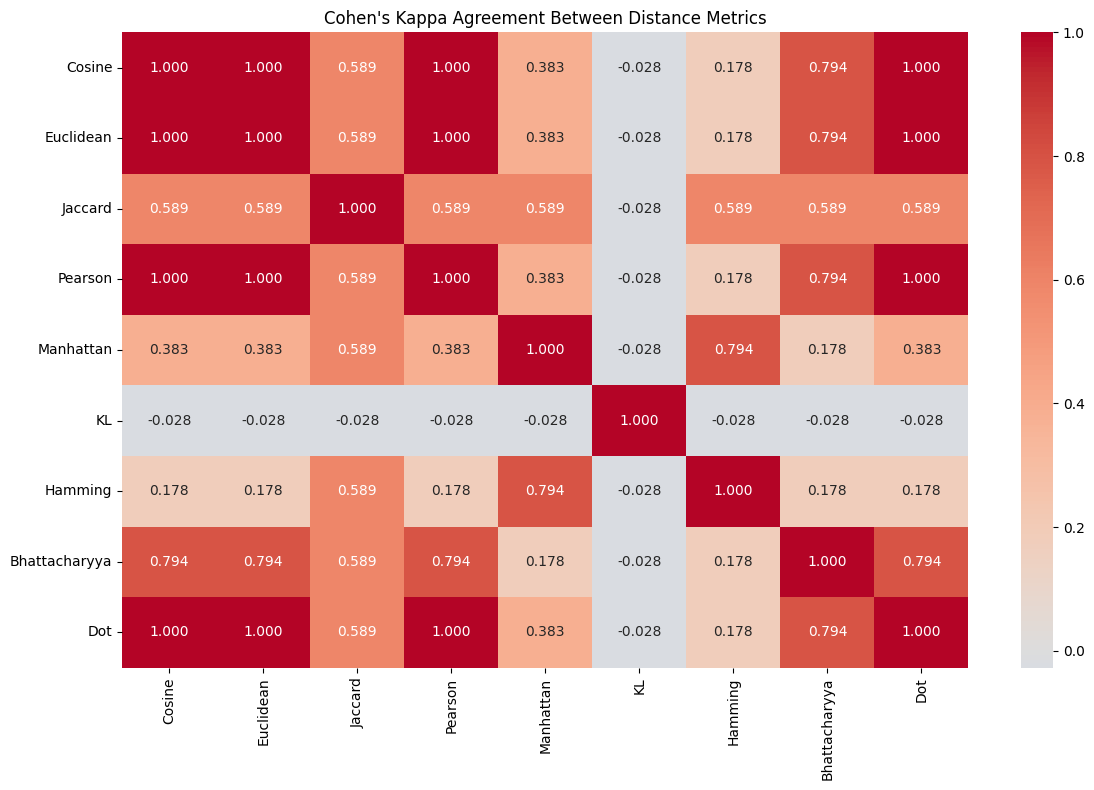

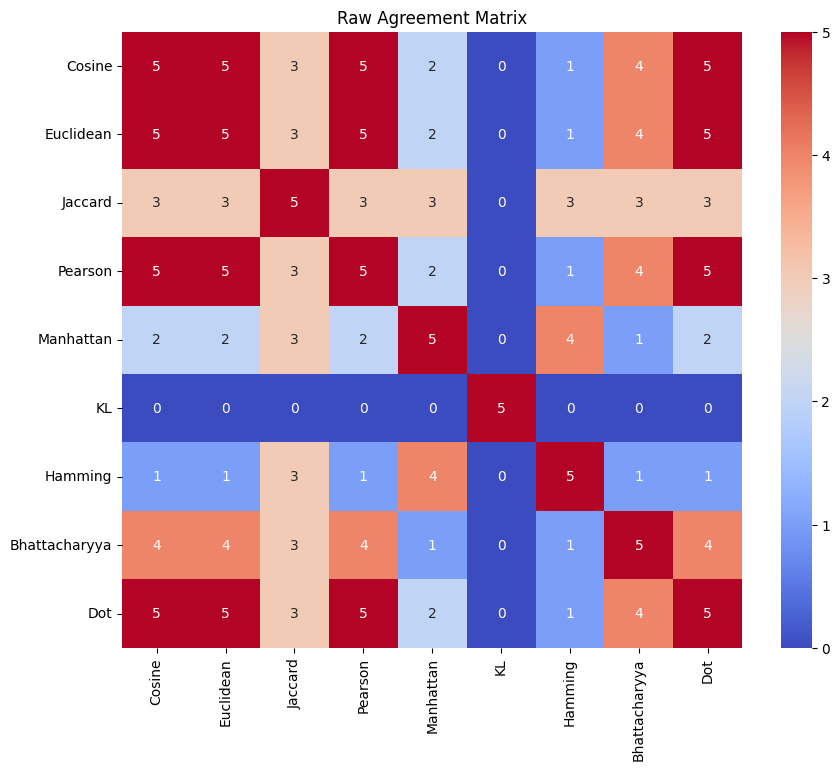

**************************5********************************
Random Query: practico gastronomia integracion fisica ensenanza


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 9 Cálculo Integral + Ej with similarity score 0.2120
Rank 2: 25 Cultura Gastronomica with similarity score 0.1766
Rank 3: 145 Programacion Para Diseño 3 with similarity score 0.1685
Rank 4: 2 Taller de Ing. Cs. Computacion with similarity score 0.1502
Rank 5: 71 Identidad Culinaria with similarity score 0.1474

Euclidean Distance:
Rank 1: 9 Cálculo Integral + Ej with distance 1.2554
Rank 2: 25 Cultura Gastronomica with distance 1.2833
Rank 3: 145 Programacion Para Diseño 3 with distance 1.2895
Rank 4: 2 Taller de Ing. Cs. Computacion with distance 1.3037
Rank 5: 71 Identidad Culinaria with distance 1.3059

Jaccard Similarity:
Rank 1: 9 Cálculo Integral + Ej with similarity score 0.0909
Rank 2: 145 Programacion Para Diseño 3 with similarity score 0.0690
Rank 3: 30 Programacion Avanzada de Apps with similarity score 0.0606
Rank 4: 83 Ensenanza de Matematicas with similarity score 0.0588
Rank 5: 80 Ensenanza de Lenguaje wi

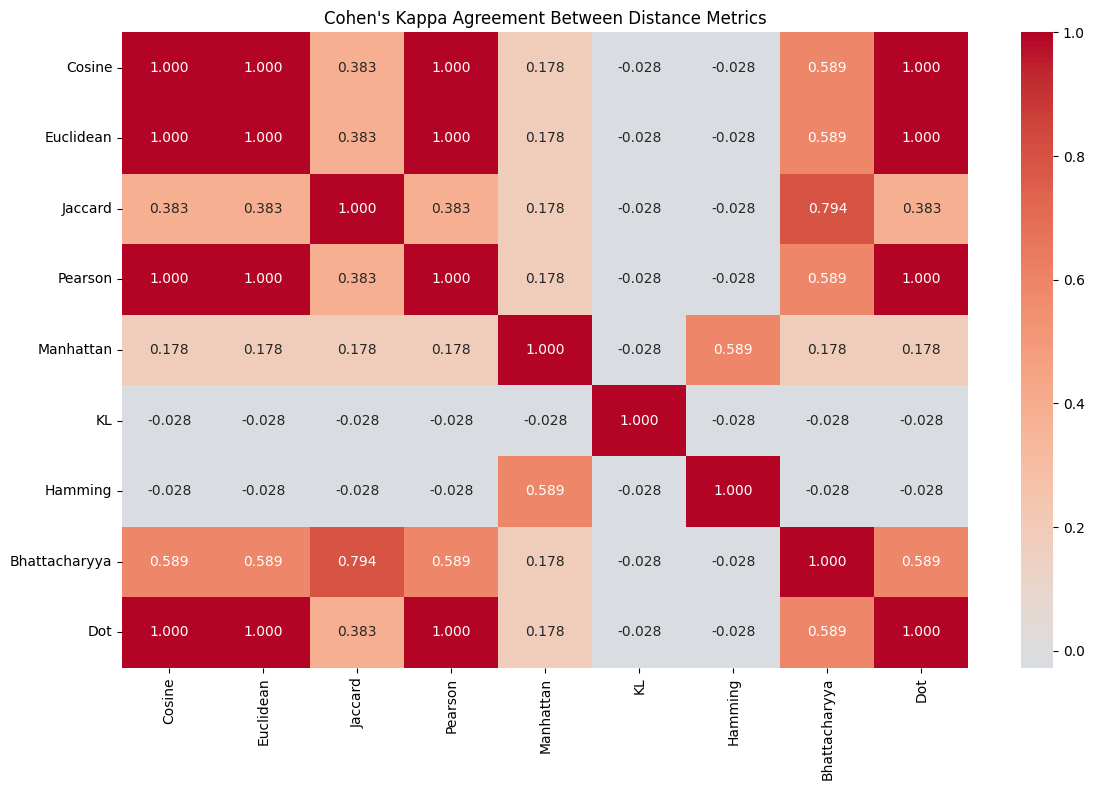

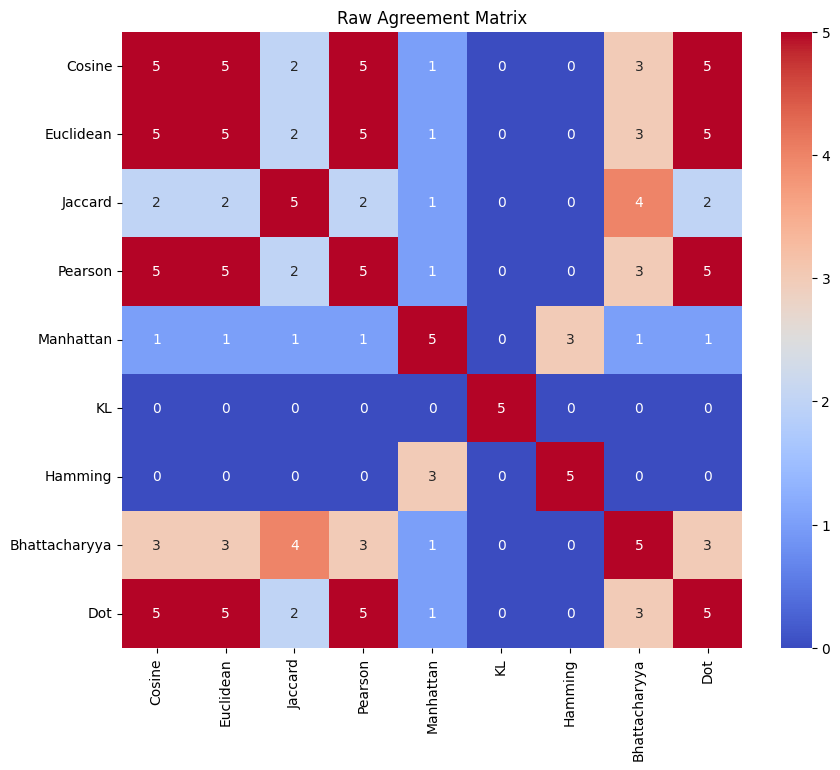

**************************6********************************
Random Query: tecnica taller hospitalidad equipo arte


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 128 Taller de Arte 1 with similarity score 0.2324
Rank 2: 131 Taller de Investigacion with similarity score 0.2210
Rank 3: 139 Taller de Arte 3 with similarity score 0.2027
Rank 4: 118 Fundamentos de las Artes with similarity score 0.1995
Rank 5: 64 Practica Culinaria 2 with similarity score 0.1995

Euclidean Distance:
Rank 1: 128 Taller de Arte 1 with distance 1.2390
Rank 2: 131 Taller de Investigacion with distance 1.2482
Rank 3: 139 Taller de Arte 3 with distance 1.2628
Rank 4: 118 Fundamentos de las Artes with distance 1.2653
Rank 5: 64 Practica Culinaria 2 with distance 1.2653

Jaccard Similarity:
Rank 1: 139 Taller de Arte 3 with similarity score 0.1250
Rank 2: 121 Dibujo para Arte y Diseno with similarity score 0.1176
Rank 3: 128 Taller de Arte 1 with similarity score 0.1111
Rank 4: 118 Fundamentos de las Artes with similarity score 0.1111
Rank 5: 131 Taller de Investigacion with similarity score 0.1111

Pearson 

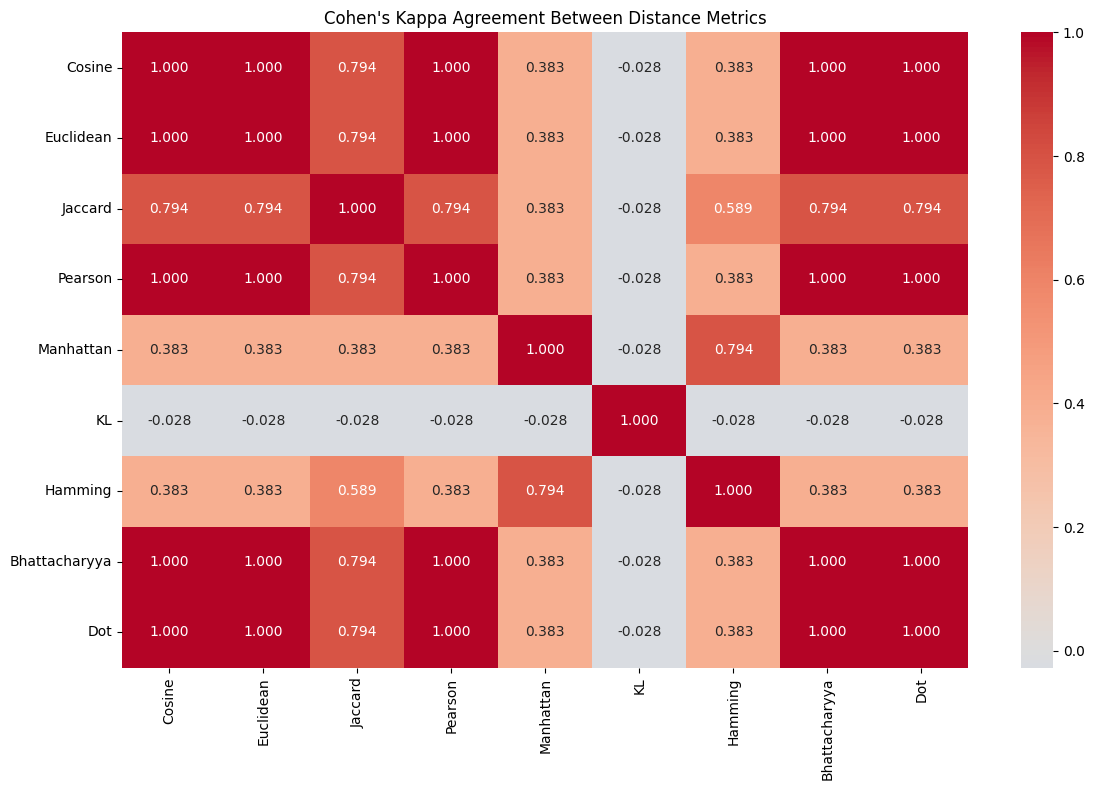

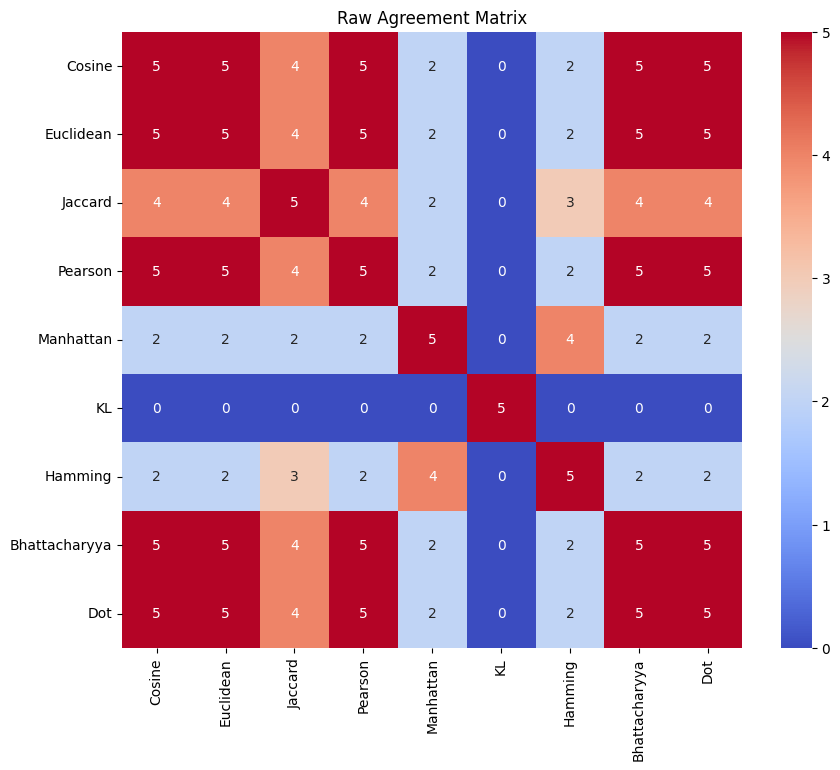

**************************7********************************
Random Query: danza panaderia ingenieria arte gestion


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 39 Proyectos  Gerencia y Análisis with similarity score 0.2360
Rank 2: 141 Temas en Comunicacion y Arte with similarity score 0.2188
Rank 3: 170 Danza Moderna 2 with similarity score 0.2087
Rank 4: 125 Nuevos Medios with similarity score 0.2077
Rank 5: 130 Arte y Contexto Social with similarity score 0.1999

Euclidean Distance:
Rank 1: 39 Proyectos  Gerencia y Análisis with distance 1.2361
Rank 2: 141 Temas en Comunicacion y Arte with distance 1.2500
Rank 3: 170 Danza Moderna 2 with distance 1.2580
Rank 4: 125 Nuevos Medios with distance 1.2588
Rank 5: 130 Arte y Contexto Social with distance 1.2650

Jaccard Similarity:
Rank 1: 130 Arte y Contexto Social with similarity score 0.0667
Rank 2: 119 Composicion Visual 1 with similarity score 0.0667
Rank 3: 135 Gestion y Produccion Cultural with similarity score 0.0625
Rank 4: 124 Teoria Critica 1  Arte & Media with similarity score 0.0625
Rank 5: 121 Dibujo para Arte y Disen

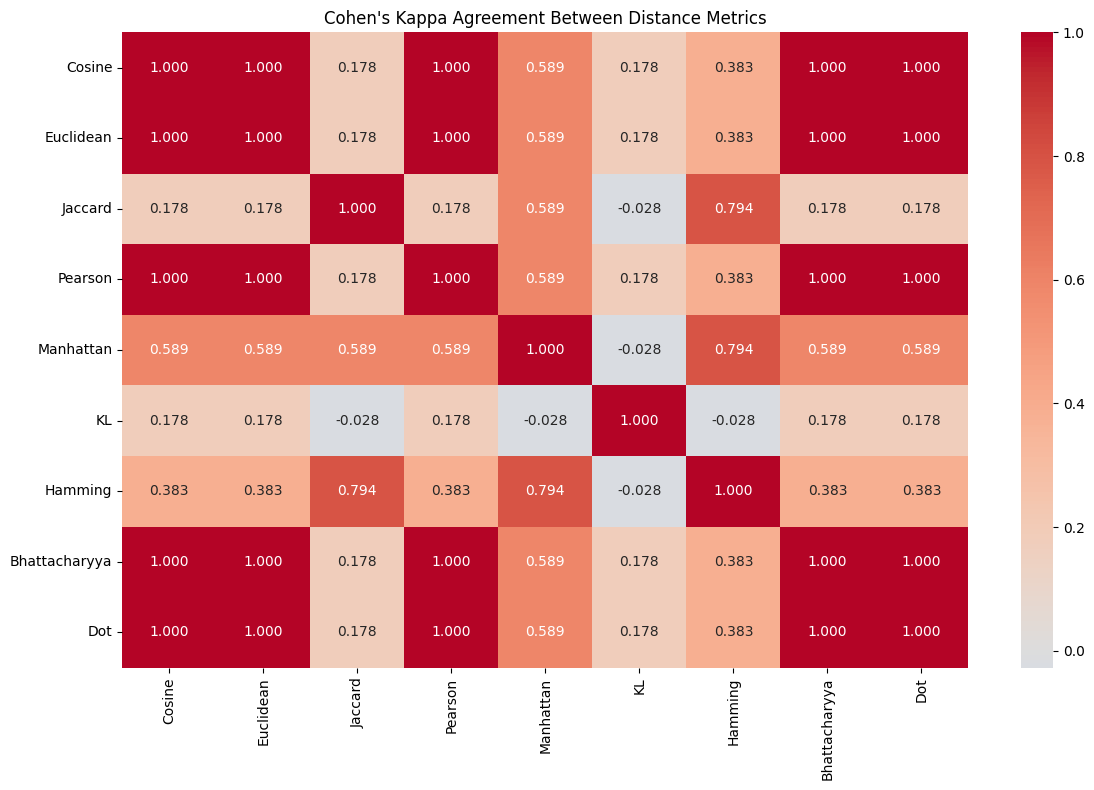

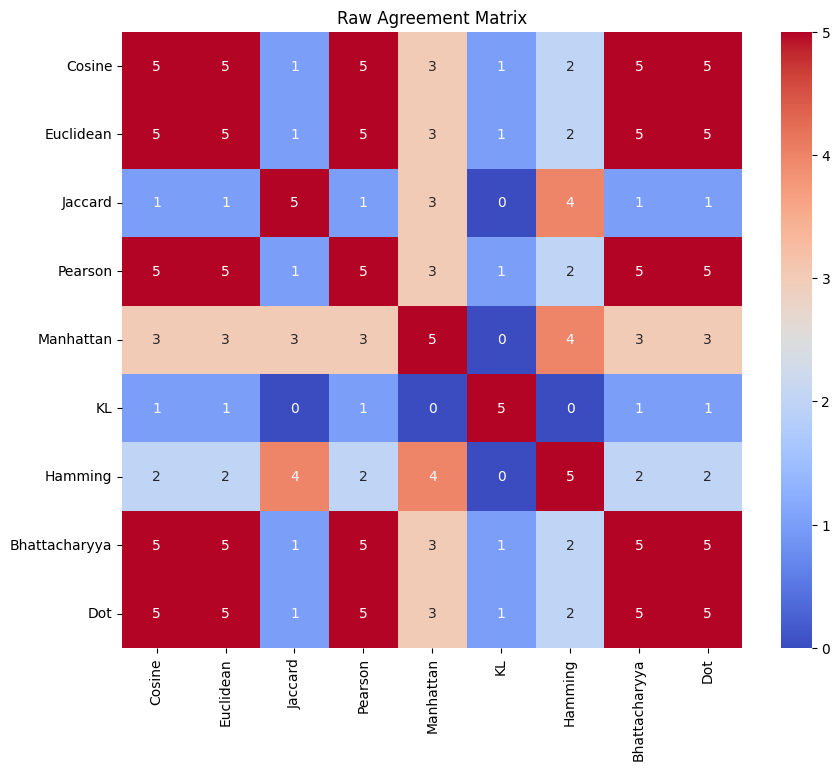

**************************8********************************
Random Query: disciplina debate entrenamiento arte fisica


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 129 Coloquios ART with similarity score 0.2346
Rank 2: 138 Enfasis 3 with similarity score 0.2289
Rank 3: 132 Enfasis 1 with similarity score 0.2191
Rank 4: 134 Enfasis 2 with similarity score 0.2094
Rank 5: 141 Temas en Comunicacion y Arte with similarity score 0.1957

Euclidean Distance:
Rank 1: 129 Coloquios ART with distance 1.2372
Rank 2: 138 Enfasis 3 with distance 1.2418
Rank 3: 132 Enfasis 1 with distance 1.2497
Rank 4: 134 Enfasis 2 with distance 1.2575
Rank 5: 141 Temas en Comunicacion y Arte with distance 1.2683

Jaccard Similarity:
Rank 1: 138 Enfasis 3 with similarity score 0.1111
Rank 2: 132 Enfasis 1 with similarity score 0.1111
Rank 3: 129 Coloquios ART with similarity score 0.1053
Rank 4: 134 Enfasis 2 with similarity score 0.1000
Rank 5: 119 Composicion Visual 1 with similarity score 0.0625

Pearson Correlation:
Rank 1: 129 Coloquios ART with correlation score 0.2293
Rank 2: 138 Enfasis 3 with correlat

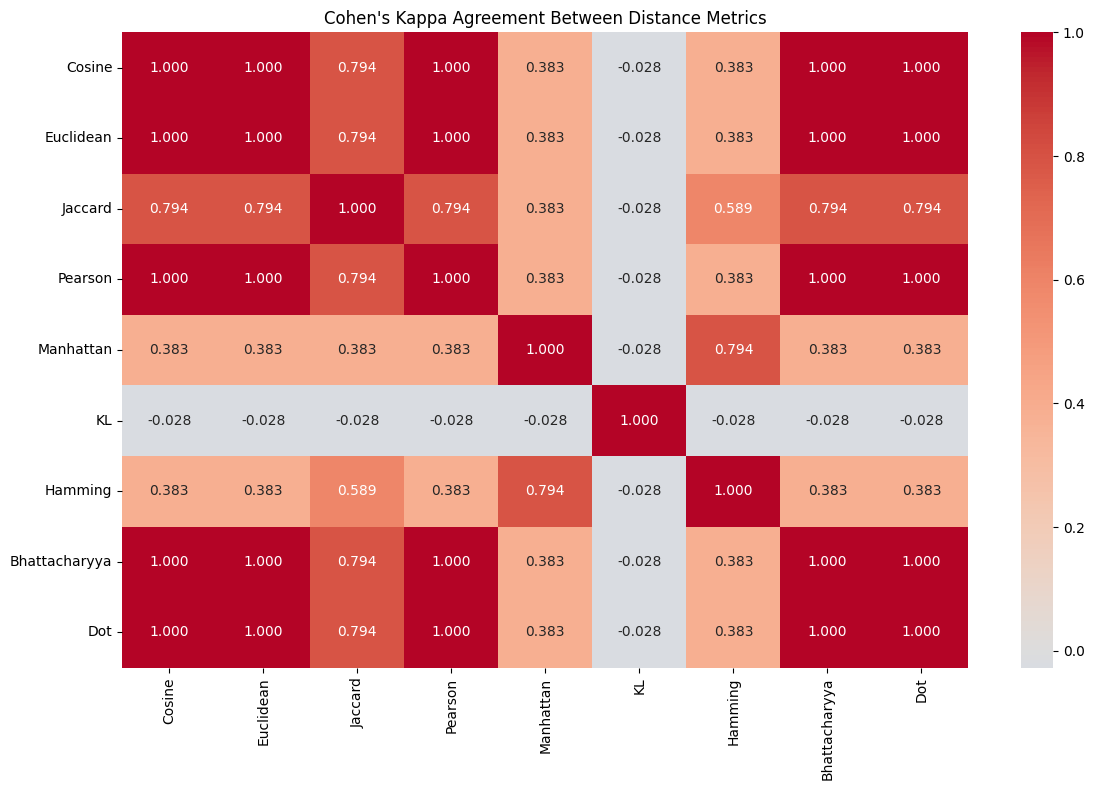

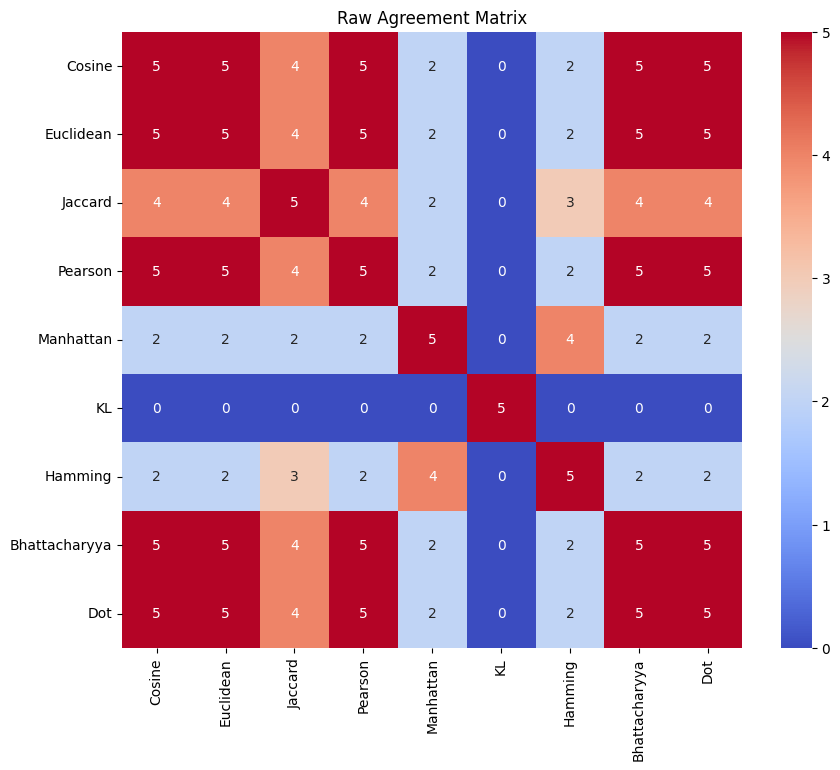

**************************9********************************
Random Query: arte educacion practico integracion social


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 130 Arte y Contexto Social with similarity score 0.3891
Rank 2: 72 Fundamentos de la Educacion with similarity score 0.2183
Rank 3: 140 Arte y Educacion   Curaduria with similarity score 0.2155
Rank 4: 9 Cálculo Integral + Ej with similarity score 0.2120
Rank 5: 141 Temas en Comunicacion y Arte with similarity score 0.1957

Euclidean Distance:
Rank 1: 130 Arte y Contexto Social with distance 1.1053
Rank 2: 72 Fundamentos de la Educacion with distance 1.2504
Rank 3: 140 Arte y Educacion   Curaduria with distance 1.2526
Rank 4: 9 Cálculo Integral + Ej with distance 1.2554
Rank 5: 141 Temas en Comunicacion y Arte with distance 1.2683

Jaccard Similarity:
Rank 1: 130 Arte y Contexto Social with similarity score 0.1333
Rank 2: 140 Arte y Educacion   Curaduria with similarity score 0.1111
Rank 3: 9 Cálculo Integral + Ej with similarity score 0.0909
Rank 4: 119 Composicion Visual 1 with similarity score 0.0625
Rank 5: 30 Progr

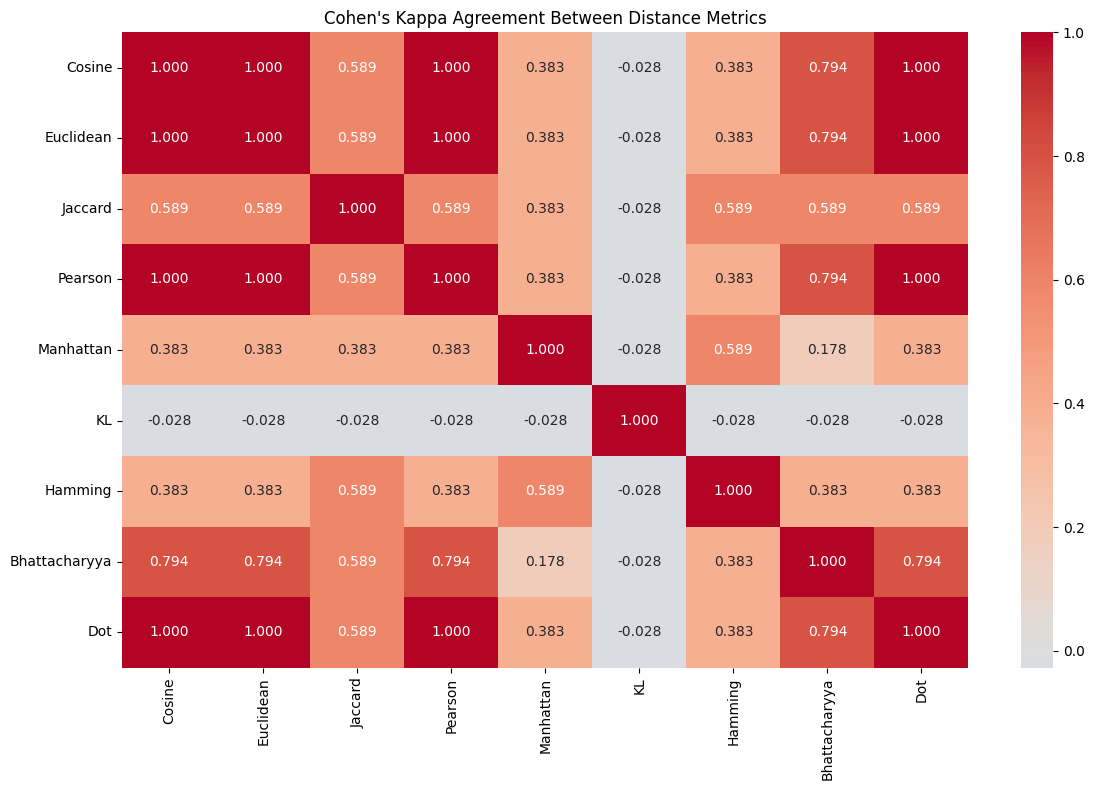

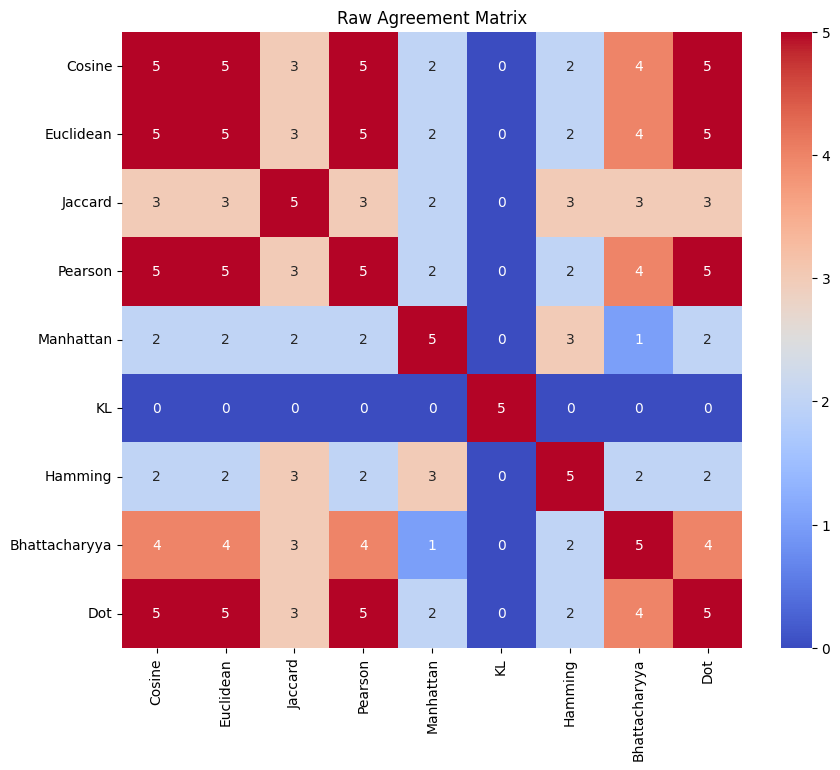

**************************10********************************
Random Query: gestion disciplina seguridad panaderia topologia


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 42 Seguridad Informática with similarity score 0.2880
Rank 2: 167 Topología 2 with similarity score 0.2638
Rank 3: 39 Proyectos  Gerencia y Análisis with similarity score 0.1660
Rank 4: 38 Sistemas Operativos with similarity score 0.1644
Rank 5: 54 Practica Culinaria 1 with similarity score 0.1492

Euclidean Distance:
Rank 1: 42 Seguridad Informática with distance 1.1933
Rank 2: 167 Topología 2 with distance 1.2134
Rank 3: 39 Proyectos  Gerencia y Análisis with distance 1.2915
Rank 4: 38 Sistemas Operativos with distance 1.2928
Rank 5: 54 Practica Culinaria 1 with distance 1.3044

Jaccard Similarity:
Rank 1: 35 Base de Datos with similarity score 0.0667
Rank 2: 42 Seguridad Informática with similarity score 0.0667
Rank 3: 38 Sistemas Operativos with similarity score 0.0645
Rank 4: 135 Gestion y Produccion Cultural with similarity score 0.0625
Rank 5: 102 Principios de Finanzas with similarity score 0.0588

Pearson Corre

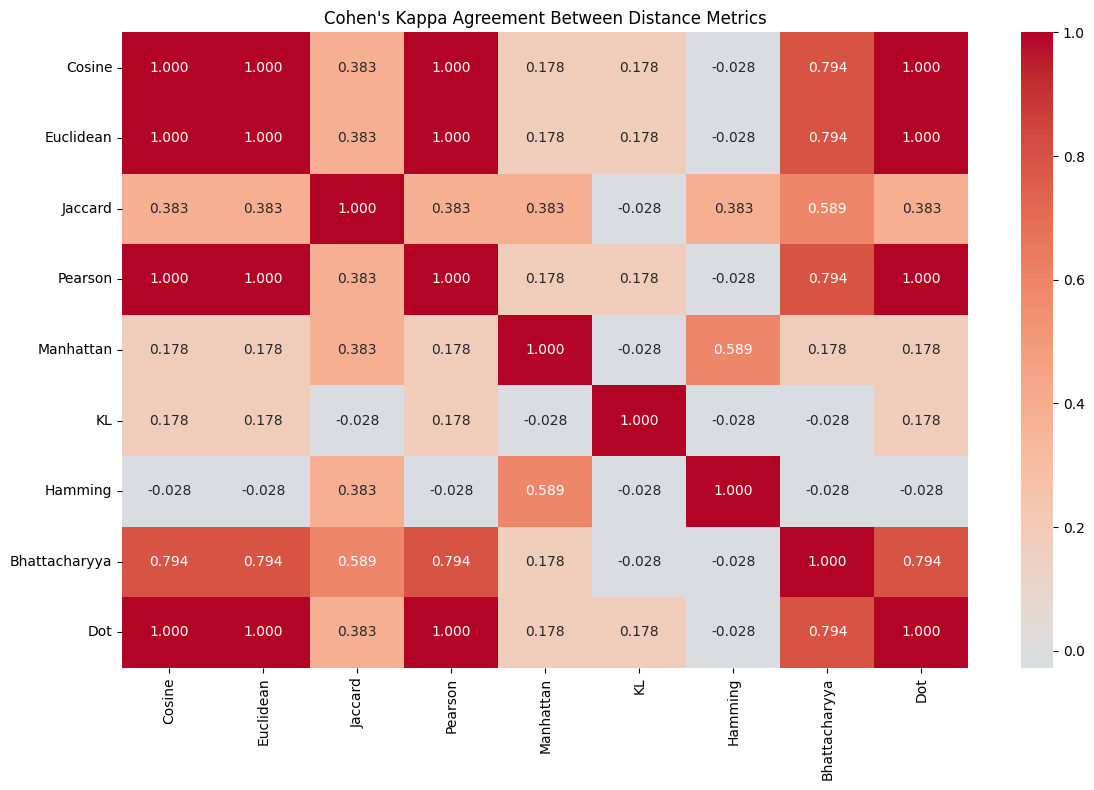

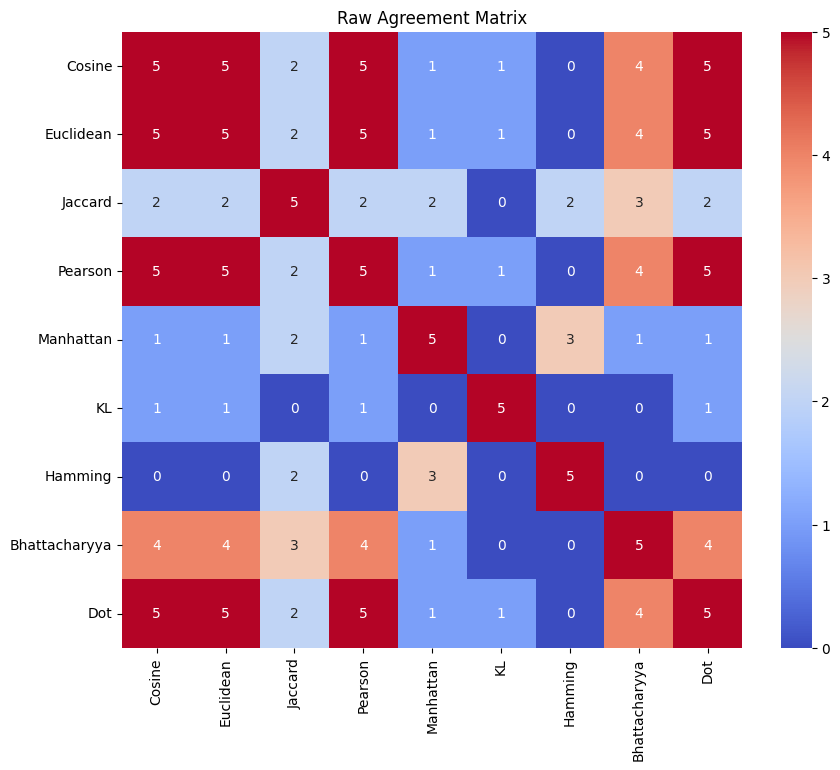

**************************11********************************
Random Query: integracion ingenieria laboratorio teorico educacion


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 17 Física para Ingeniería 1 +Lab Ej with similarity score 0.2943
Rank 2: 23 Física para Ingeniería 2 +Lab Ej with similarity score 0.1922
Rank 3: 18 Cálculo Vectorial with similarity score 0.1836
Rank 4: 2 Taller de Ing. Cs. Computacion with similarity score 0.1830
Rank 5: 152 Cálculo para Ciencias 2 with similarity score 0.1669

Euclidean Distance:
Rank 1: 17 Física para Ingeniería 1 +Lab Ej with distance 1.1880
Rank 2: 23 Física para Ingeniería 2 +Lab Ej with distance 1.2711
Rank 3: 18 Cálculo Vectorial with distance 1.2778
Rank 4: 2 Taller de Ing. Cs. Computacion with distance 1.2783
Rank 5: 152 Cálculo para Ciencias 2 with distance 1.2908

Jaccard Similarity:
Rank 1: 17 Física para Ingeniería 1 +Lab Ej with similarity score 0.1364
Rank 2: 23 Física para Ingeniería 2 +Lab Ej with similarity score 0.1111
Rank 3: 18 Cálculo Vectorial with similarity score 0.0909
Rank 4: 152 Cálculo para Ciencias 2 with similarity score

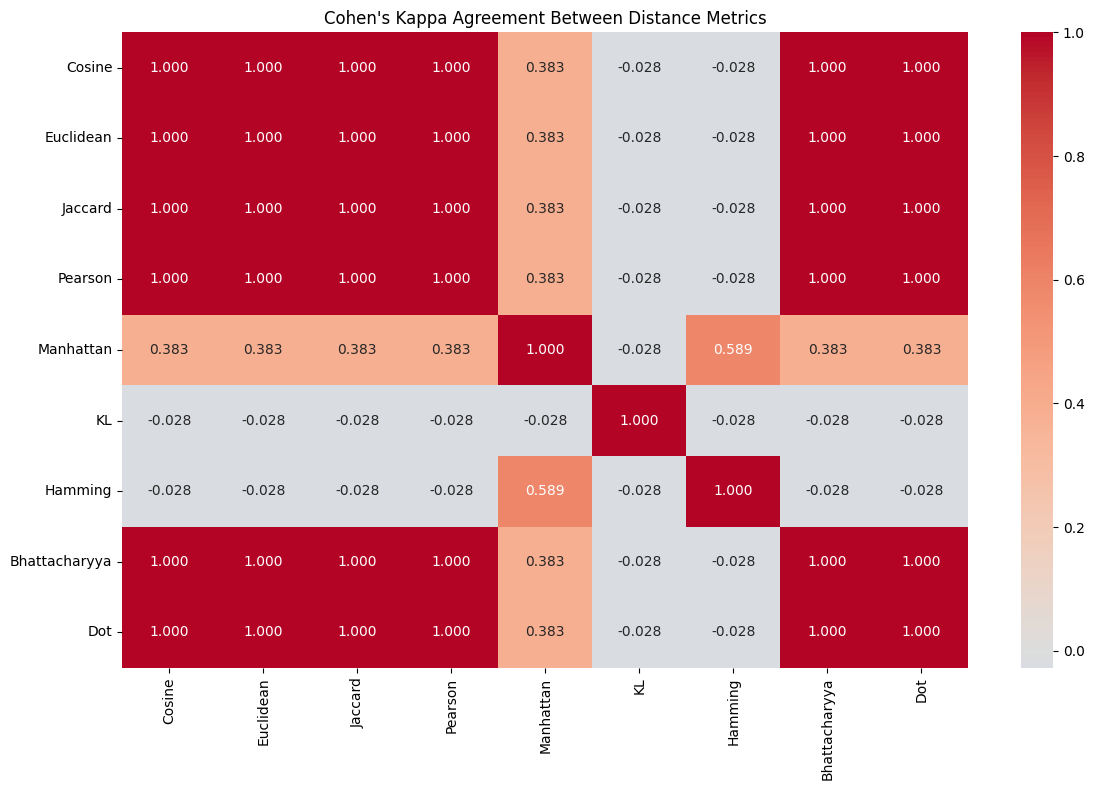

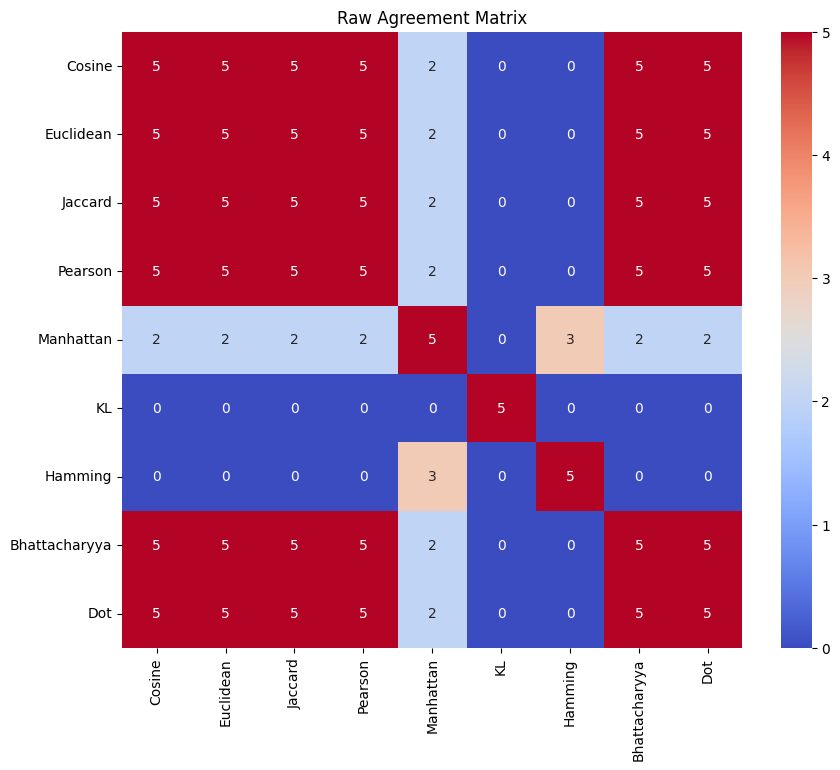

**************************12********************************
Random Query: negocio cultural aplicacion multimedia disciplina


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 135 Gestion y Produccion Cultural with similarity score 0.2473
Rank 2: 25 Cultura Gastronomica with similarity score 0.1562
Rank 3: 103 Coloquios adm with similarity score 0.1489
Rank 4: 125 Nuevos Medios with similarity score 0.1347
Rank 5: 117 Herramientas Digitales 1 with similarity score 0.1321

Euclidean Distance:
Rank 1: 135 Gestion y Produccion Cultural with distance 1.2269
Rank 2: 25 Cultura Gastronomica with distance 1.2991
Rank 3: 103 Coloquios adm with distance 1.3047
Rank 4: 125 Nuevos Medios with distance 1.3155
Rank 5: 117 Herramientas Digitales 1 with distance 1.3175

Jaccard Similarity:
Rank 1: 130 Arte y Contexto Social with similarity score 0.0625
Rank 2: 139 Taller de Arte 3 with similarity score 0.0588
Rank 3: 108 Economia y Negocios with similarity score 0.0588
Rank 4: 135 Gestion y Produccion Cultural with similarity score 0.0588
Rank 5: 103 Coloquios adm with similarity score 0.0556

Pearson Corre

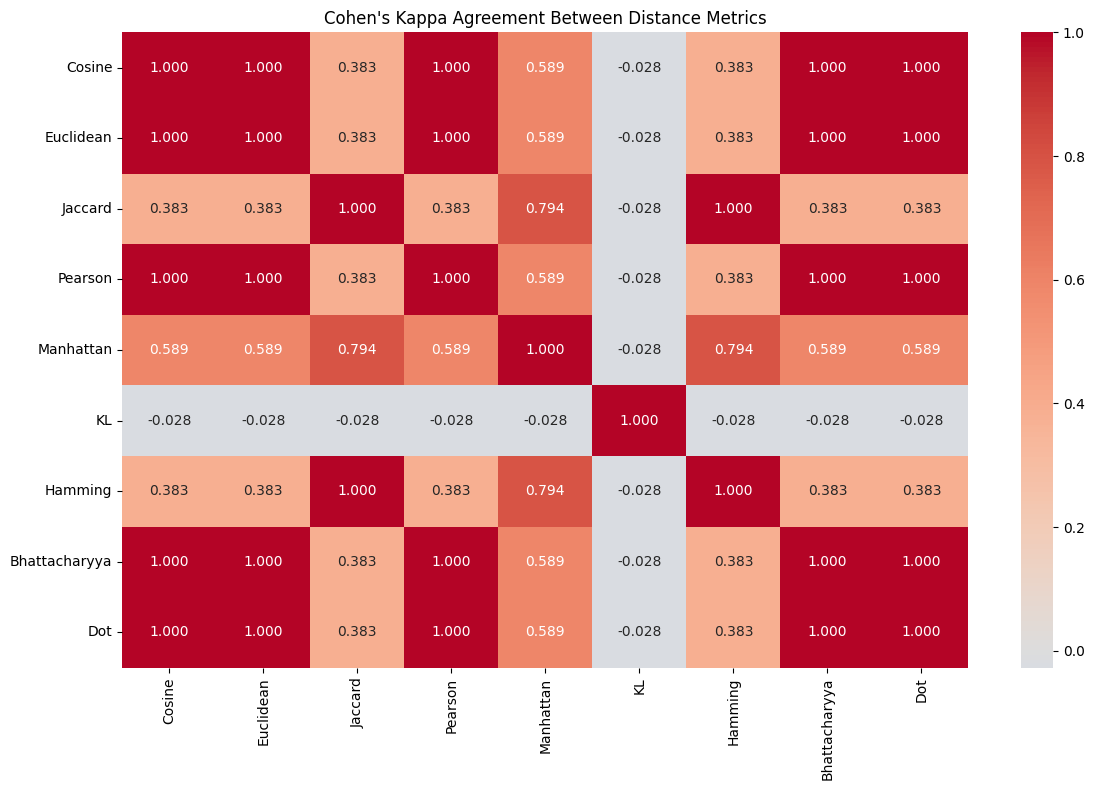

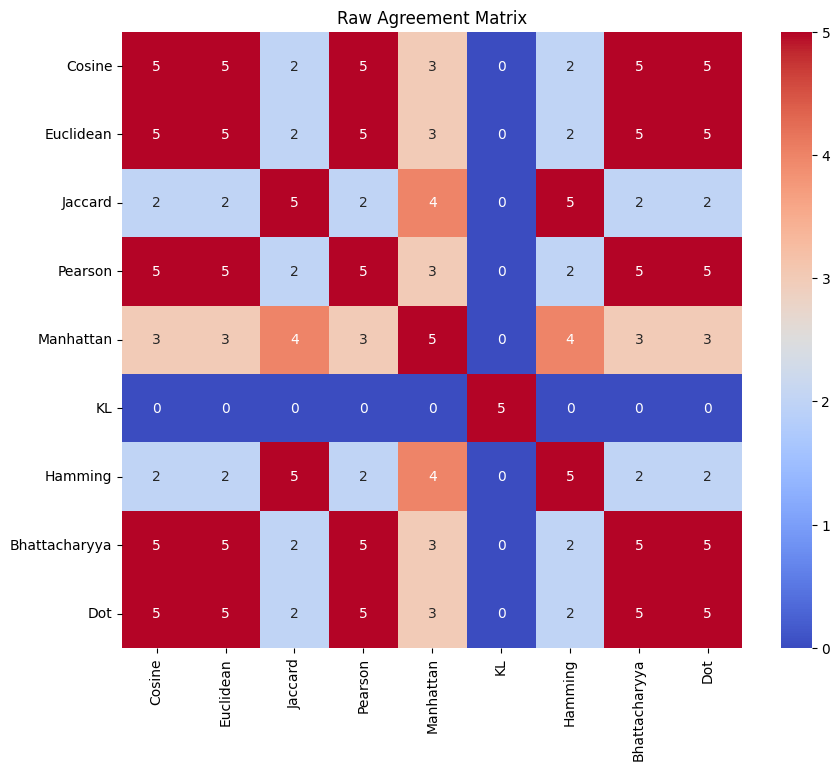

**************************13********************************
Random Query: seguridad integracion diseno biologia algebra


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 145 Programacion Para Diseño 3 with similarity score 0.2685
Rank 2: 42 Seguridad Informática with similarity score 0.2078
Rank 3: 157 Análisis Numérico with similarity score 0.1790
Rank 4: 121 Dibujo para Arte y Diseno with similarity score 0.1725
Rank 5: 30 Programacion Avanzada de Apps with similarity score 0.1496

Euclidean Distance:
Rank 1: 145 Programacion Para Diseño 3 with distance 1.2096
Rank 2: 42 Seguridad Informática with distance 1.2587
Rank 3: 157 Análisis Numérico with distance 1.2814
Rank 4: 121 Dibujo para Arte y Diseno with distance 1.2865
Rank 5: 30 Programacion Avanzada de Apps with distance 1.3041

Jaccard Similarity:
Rank 1: 157 Análisis Numérico with similarity score 0.0952
Rank 2: 145 Programacion Para Diseño 3 with similarity score 0.0690
Rank 3: 35 Base de Datos with similarity score 0.0645
Rank 4: 30 Programacion Avanzada de Apps with similarity score 0.0606
Rank 5: 21 Programacion de Apps with

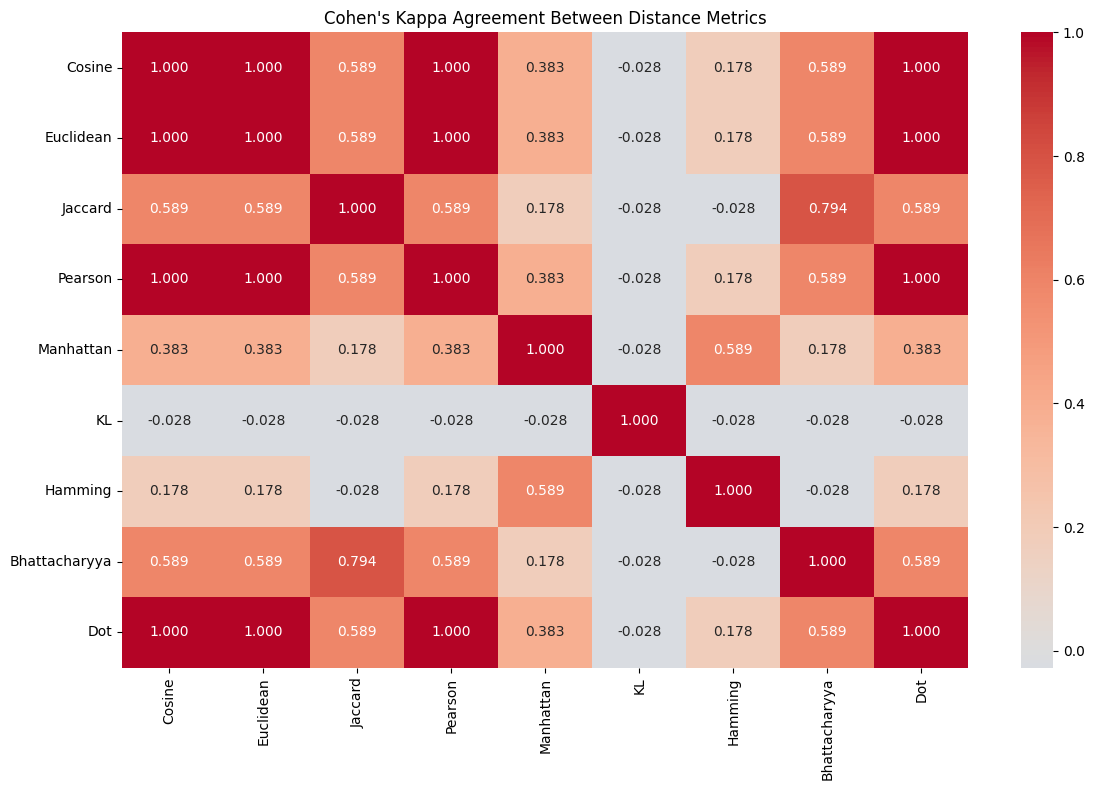

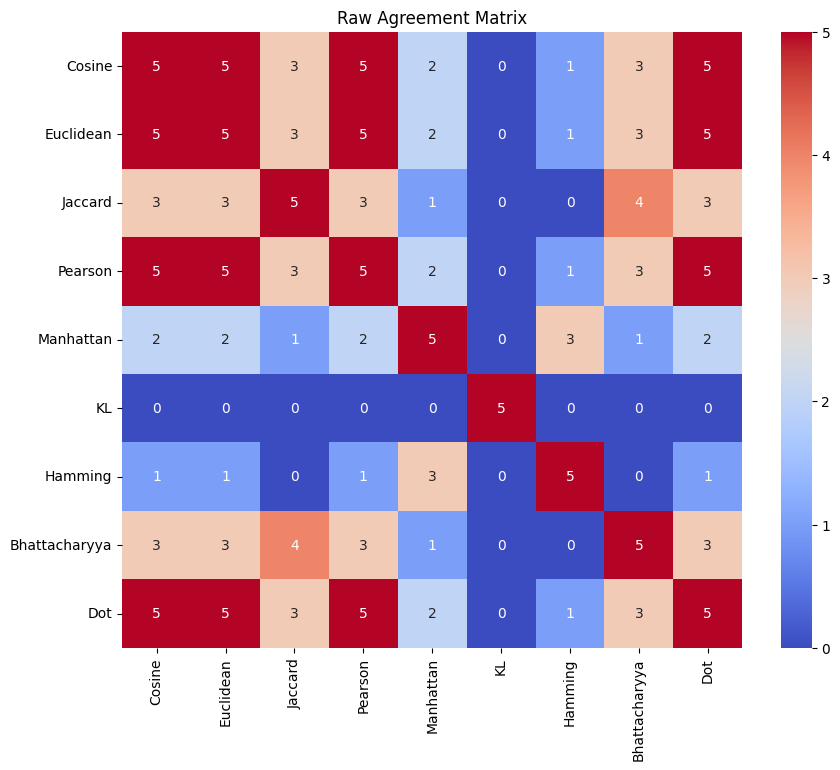

**************************14********************************
Random Query: matematico competitivo optimizacion diseno ensenanza


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 181 Inv. de Operaciones 1 +Lab with similarity score 0.2152
Rank 2: 144 Programacion Para Diseño 2 with similarity score 0.2055
Rank 3: 145 Programacion Para Diseño 3 with similarity score 0.1943
Rank 4: 83 Ensenanza de Matematicas with similarity score 0.1780
Rank 5: 121 Dibujo para Arte y Diseno with similarity score 0.1725

Euclidean Distance:
Rank 1: 181 Inv. de Operaciones 1 +Lab with distance 1.2528
Rank 2: 144 Programacion Para Diseño 2 with distance 1.2606
Rank 3: 145 Programacion Para Diseño 3 with distance 1.2694
Rank 4: 83 Ensenanza de Matematicas with distance 1.2822
Rank 5: 121 Dibujo para Arte y Diseno with distance 1.2865

Jaccard Similarity:
Rank 1: 181 Inv. de Operaciones 1 +Lab with similarity score 0.0741
Rank 2: 144 Programacion Para Diseño 2 with similarity score 0.0667
Rank 3: 35 Base de Datos with similarity score 0.0645
Rank 4: 83 Ensenanza de Matematicas with similarity score 0.0588
Rank 5: 121 

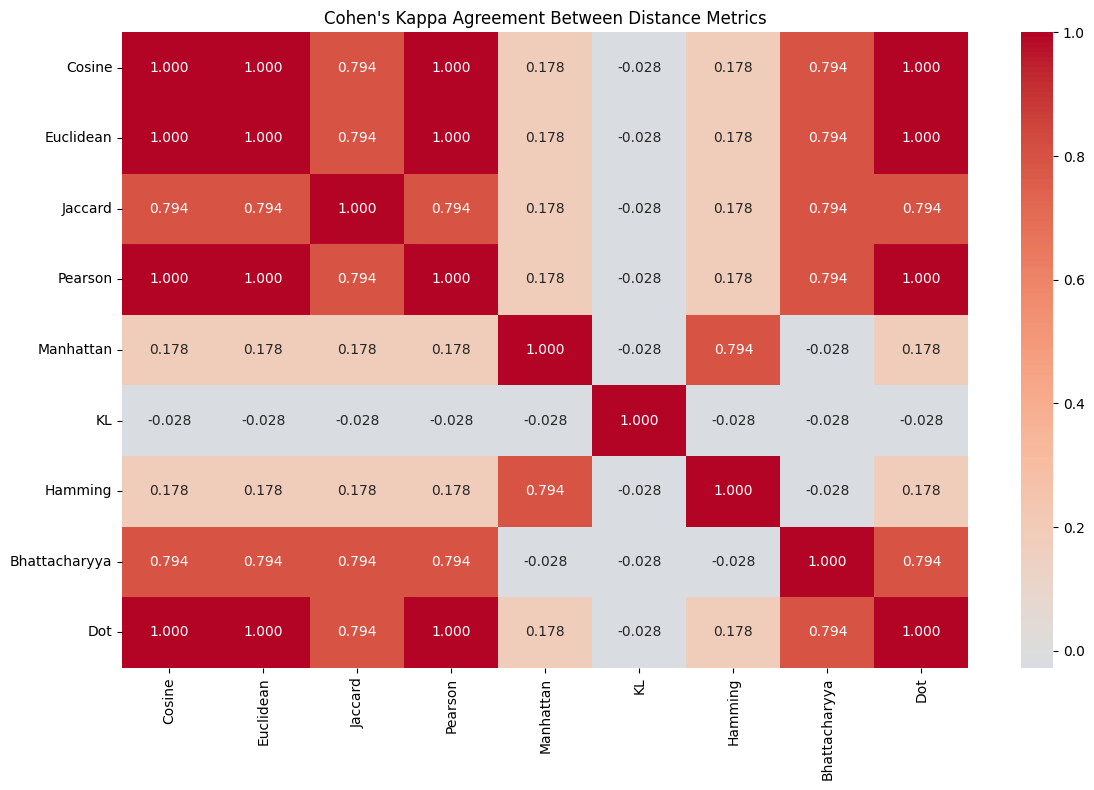

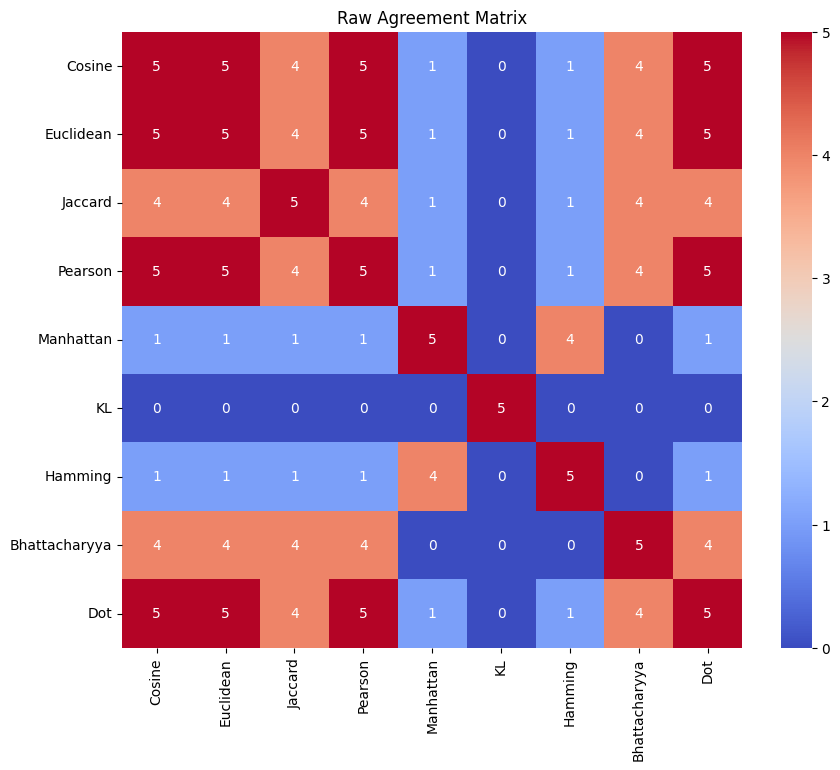

**************************15********************************
Random Query: panaderia gramatica pedagogico biologia competitivo


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 116 Analisis Estrategico ADM with similarity score 0.1658
Rank 2: 6 Inglés Nivel 1 with similarity score 0.1276
Rank 3: 58 Introduccion a la Biología +Ej with similarity score 0.1191
Rank 4: 91 Inclusion y Diversidad with similarity score 0.1181
Rank 5: 175 Lenguaje del Cine with similarity score 0.1164

Euclidean Distance:
Rank 1: 116 Analisis Estrategico ADM with distance 1.2917
Rank 2: 6 Inglés Nivel 1 with distance 1.3209
Rank 3: 58 Introduccion a la Biología +Ej with distance 1.3273
Rank 4: 91 Inclusion y Diversidad with distance 1.3281
Rank 5: 175 Lenguaje del Cine with distance 1.3294

Jaccard Similarity:
Rank 1: 116 Analisis Estrategico ADM with similarity score 0.0556
Rank 2: 175 Lenguaje del Cine with similarity score 0.0476
Rank 3: 6 Inglés Nivel 1 with similarity score 0.0400
Rank 4: 91 Inclusion y Diversidad with similarity score 0.0323
Rank 5: 58 Introduccion a la Biología +Ej with similarity score 0.0294


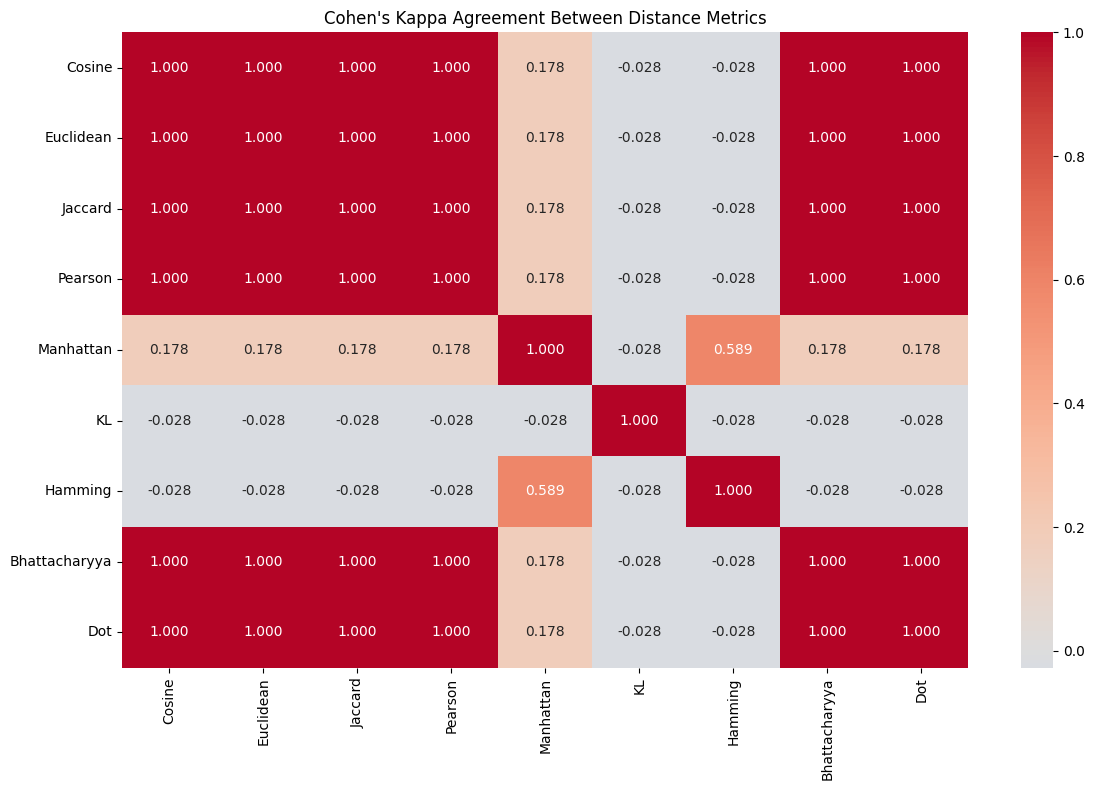

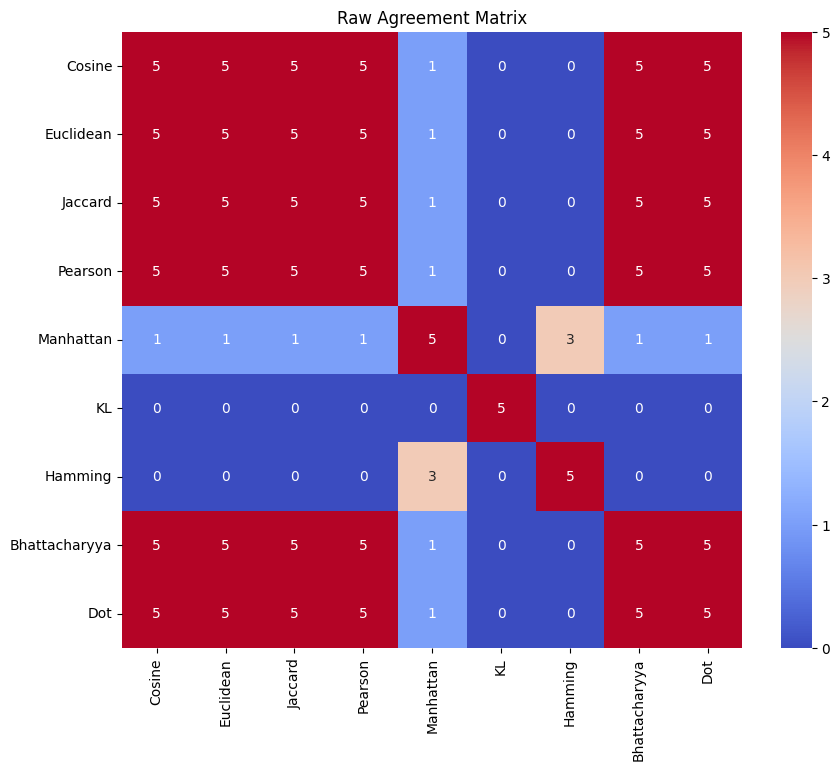

**************************16********************************
Random Query: improvisacion negocio taller investigacion ensenanza


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 131 Taller de Investigacion with similarity score 0.3553
Rank 2: 103 Coloquios adm with similarity score 0.1489
Rank 3: 1 Escritura Academica with similarity score 0.1384
Rank 4: 139 Taller de Arte 3 with similarity score 0.1339
Rank 5: 128 Taller de Arte 1 with similarity score 0.1326

Euclidean Distance:
Rank 1: 131 Taller de Investigacion with distance 1.1355
Rank 2: 103 Coloquios adm with distance 1.3047
Rank 3: 1 Escritura Academica with distance 1.3127
Rank 4: 139 Taller de Arte 3 with distance 1.3161
Rank 5: 128 Taller de Arte 1 with distance 1.3171

Jaccard Similarity:
Rank 1: 131 Taller de Investigacion with similarity score 0.1111
Rank 2: 139 Taller de Arte 3 with similarity score 0.0588
Rank 3: 103 Coloquios adm with similarity score 0.0556
Rank 4: 128 Taller de Arte 1 with similarity score 0.0526
Rank 5: 113 Negocios Internacionales with similarity score 0.0526

Pearson Correlation:
Rank 1: 131 Taller de Inv

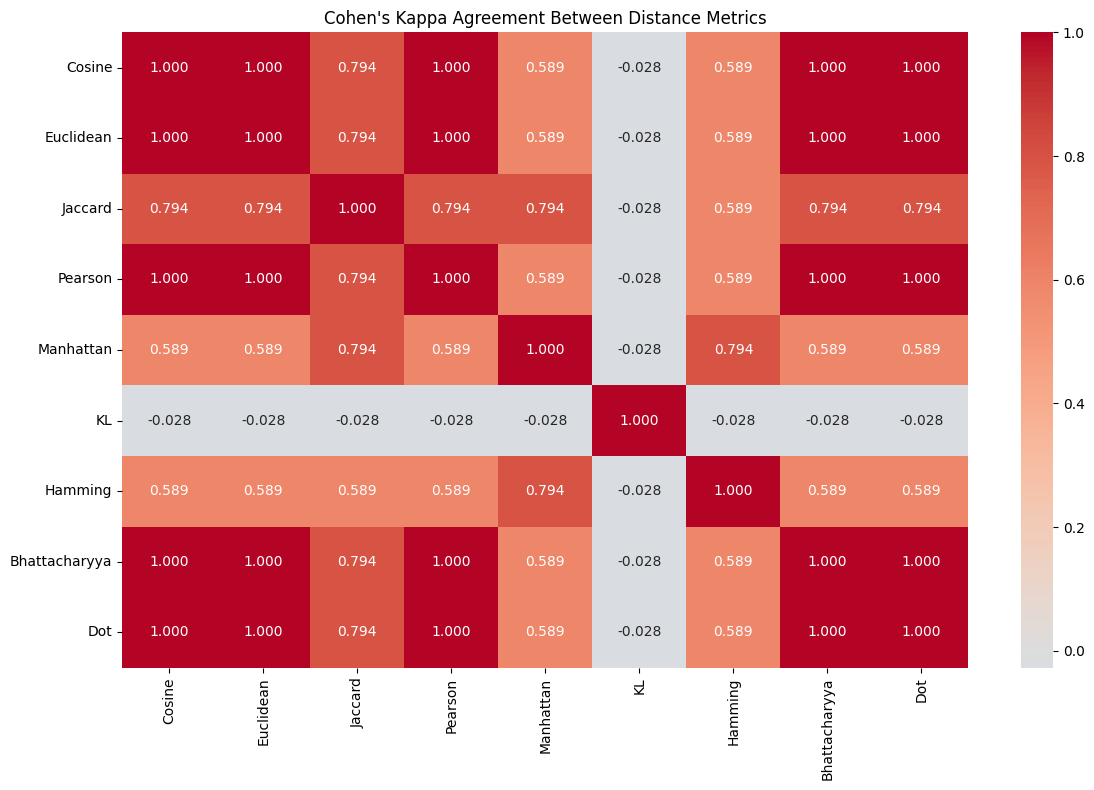

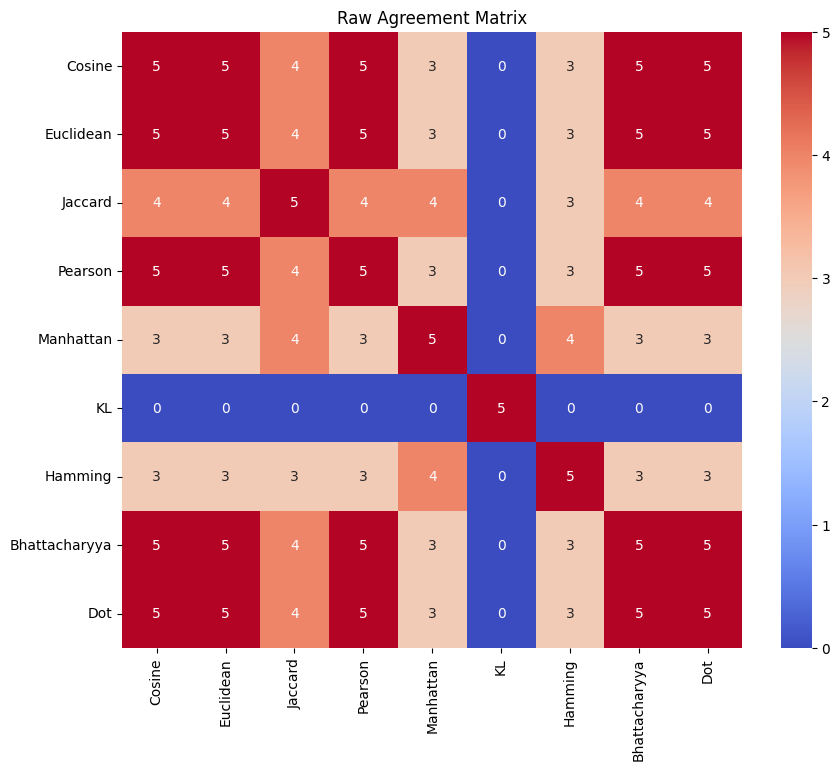

**************************17********************************
Random Query: competitivo optimizacion topologia programacion pedagogico


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 144 Programacion Para Diseño 2 with similarity score 0.2924
Rank 2: 143 Programacion Para Diseño 1 with similarity score 0.2591
Rank 3: 167 Topología 2 with similarity score 0.2360
Rank 4: 14 Programacion Avanzada en C++ with similarity score 0.1965
Rank 5: 30 Programacion Avanzada de Apps with similarity score 0.1498

Euclidean Distance:
Rank 1: 144 Programacion Para Diseño 2 with distance 1.1896
Rank 2: 143 Programacion Para Diseño 1 with distance 1.2173
Rank 3: 167 Topología 2 with distance 1.2361
Rank 4: 14 Programacion Avanzada en C++ with distance 1.2677
Rank 5: 30 Programacion Avanzada de Apps with distance 1.3040

Jaccard Similarity:
Rank 1: 144 Programacion Para Diseño 2 with similarity score 0.0667
Rank 2: 30 Programacion Avanzada de Apps with similarity score 0.0606
Rank 3: 116 Analisis Estrategico ADM with similarity score 0.0526
Rank 4: 14 Programacion Avanzada en C++ with similarity score 0.0455
Rank 5: 15

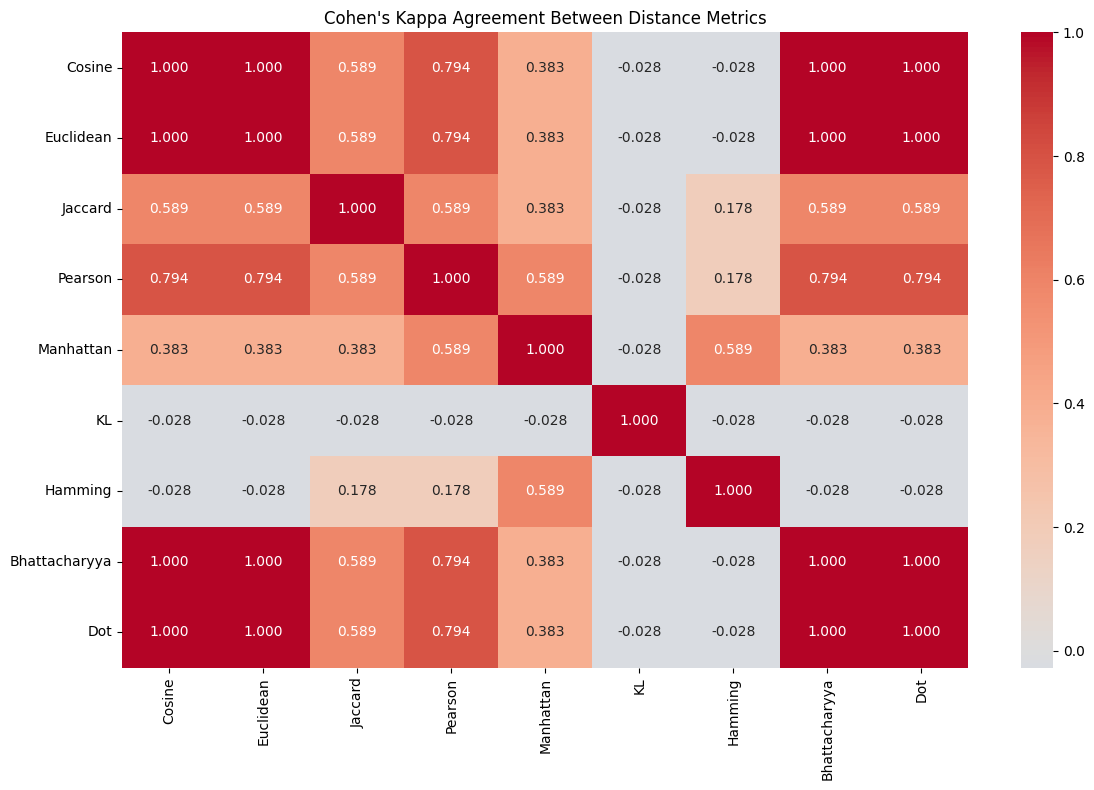

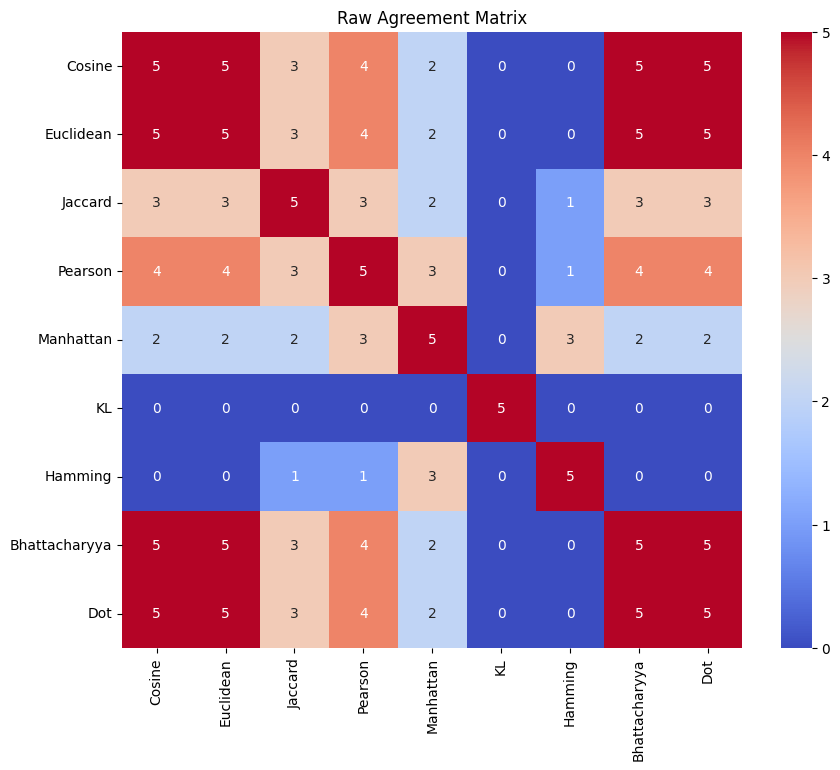

**************************18********************************
Random Query: planificacion ciencia integracion debate explorar


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 88 Ensenanza de Ciencias with similarity score 0.2297
Rank 2: 152 Cálculo para Ciencias 2 with similarity score 0.1876
Rank 3: 140 Arte y Educacion   Curaduria with similarity score 0.1715
Rank 4: 76 Estadistica para CCSS with similarity score 0.1546
Rank 5: 157 Análisis Numérico with similarity score 0.1422

Euclidean Distance:
Rank 1: 88 Ensenanza de Ciencias with distance 1.2412
Rank 2: 152 Cálculo para Ciencias 2 with distance 1.2747
Rank 3: 140 Arte y Educacion   Curaduria with distance 1.2873
Rank 4: 76 Estadistica para CCSS with distance 1.3003
Rank 5: 157 Análisis Numérico with distance 1.3098

Jaccard Similarity:
Rank 1: 140 Arte y Educacion   Curaduria with similarity score 0.1111
Rank 2: 104 Finanzas Corporativas with similarity score 0.1053
Rank 3: 157 Análisis Numérico with similarity score 0.0952
Rank 4: 152 Cálculo para Ciencias 2 with similarity score 0.0870
Rank 5: 88 Ensenanza de Ciencias with similari

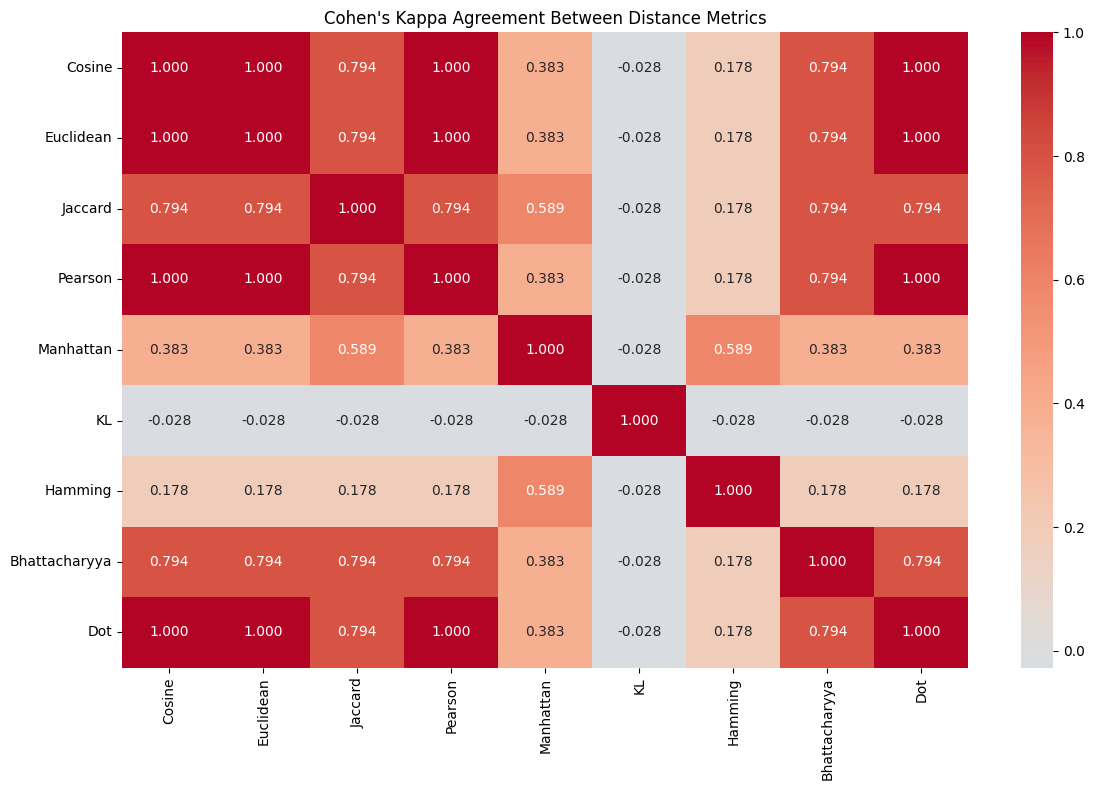

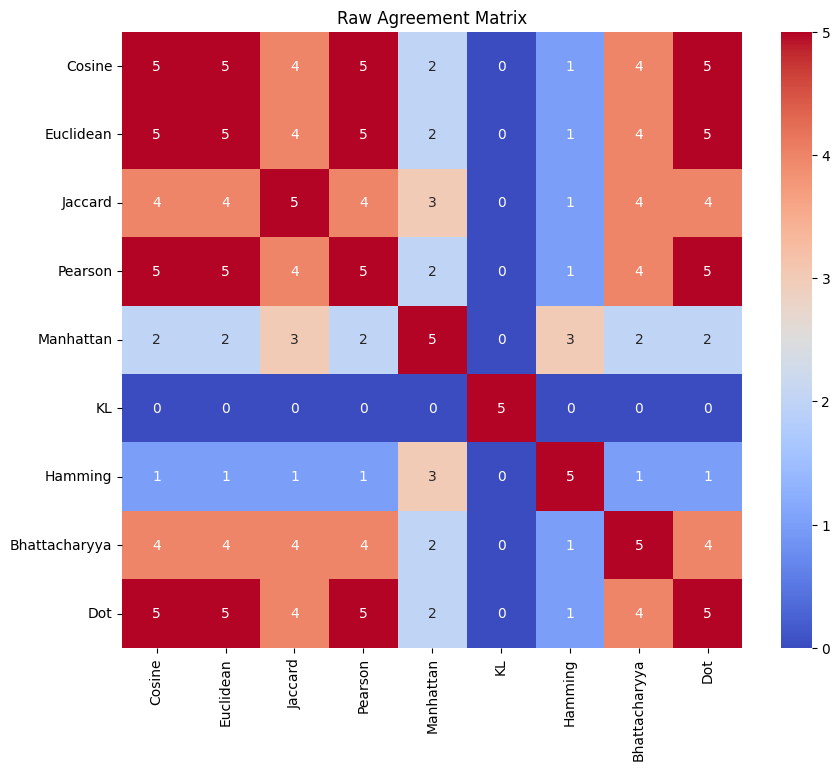

**************************19********************************
Random Query: planificacion filme debate hospitalidad optimizacion


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 51 Introduccion a la Hospitalidad with similarity score 0.2186
Rank 2: 129 Coloquios ART with similarity score 0.1553
Rank 3: 69 Administracion de Eventos with similarity score 0.1411
Rank 4: 159 Combinatoria y Grafos with similarity score 0.1261
Rank 5: 181 Inv. de Operaciones 1 +Lab with similarity score 0.1184

Euclidean Distance:
Rank 1: 51 Introduccion a la Hospitalidad with distance 1.2501
Rank 2: 129 Coloquios ART with distance 1.2998
Rank 3: 69 Administracion de Eventos with distance 1.3106
Rank 4: 159 Combinatoria y Grafos with distance 1.3220
Rank 5: 181 Inv. de Operaciones 1 +Lab with distance 1.3279

Jaccard Similarity:
Rank 1: 135 Gestion y Produccion Cultural with similarity score 0.0625
Rank 2: 140 Arte y Educacion   Curaduria with similarity score 0.0556
Rank 3: 69 Administracion de Eventos with similarity score 0.0541
Rank 4: 104 Finanzas Corporativas with similarity score 0.0526
Rank 5: 111 Proyectos E

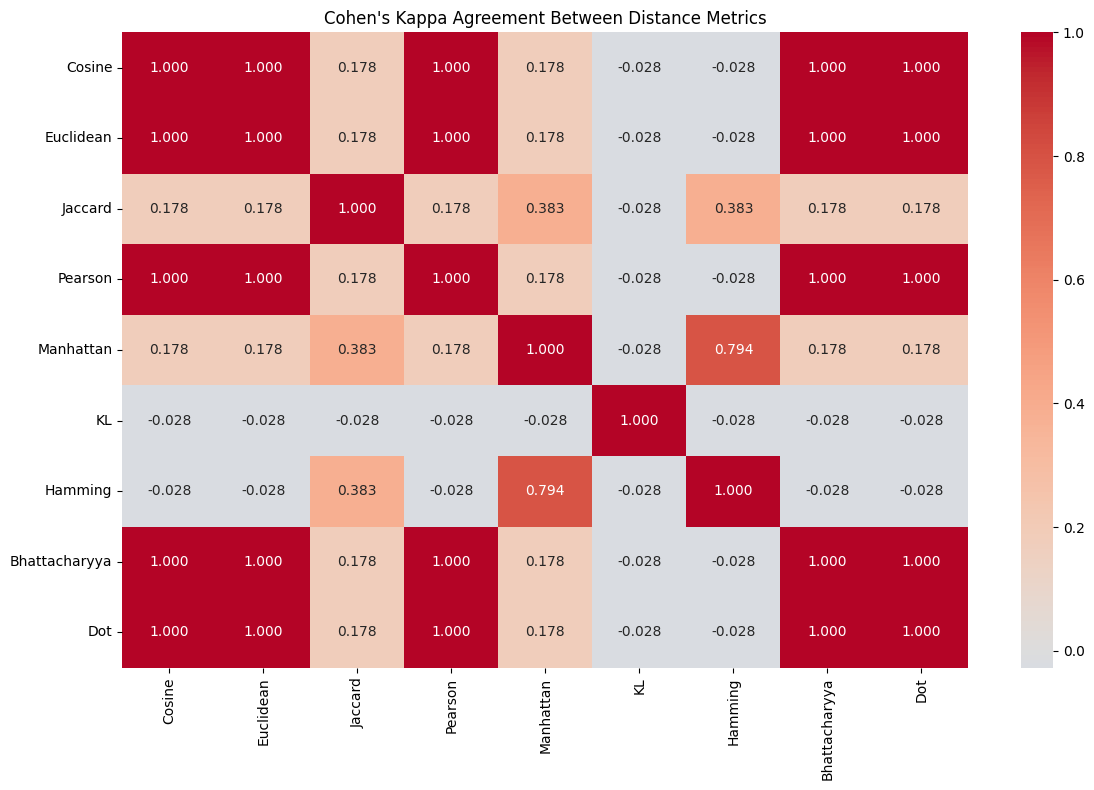

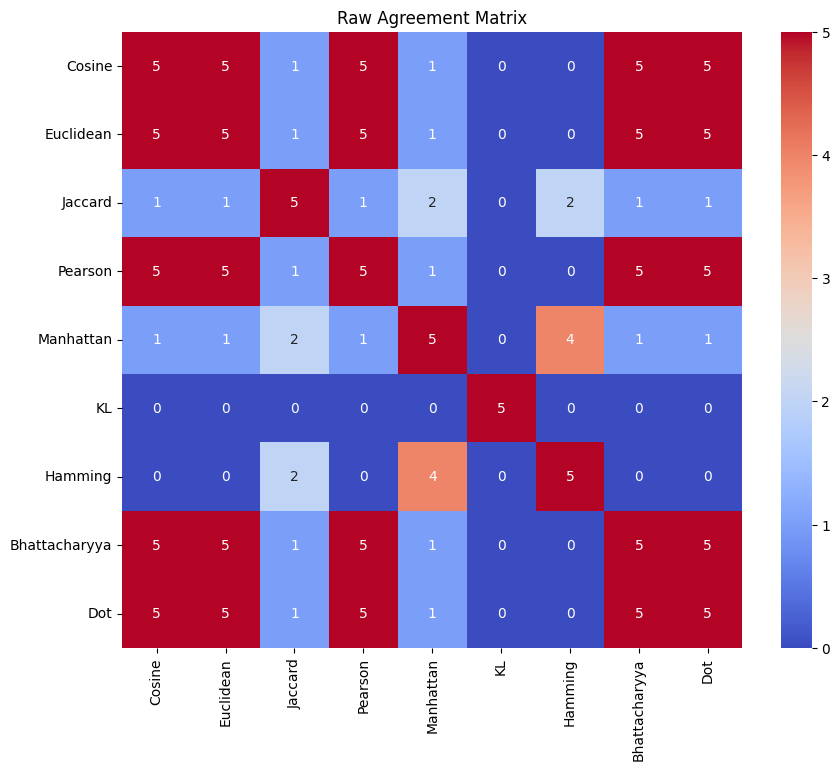

**************************20********************************
Random Query: gramatica taller biologia social danza


C:\Users\NICO\AppData\Local\Temp\ipykernel_12452\1641521469.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


=== Top 5 Rankings for Each Metric ===

Cosine Similarity:
Rank 1: 130 Arte y Contexto Social with similarity score 0.2103
Rank 2: 170 Danza Moderna 2 with similarity score 0.1867
Rank 3: 174 Proyecto final en Danza with similarity score 0.1694
Rank 4: 24 Aprendizaje y Servicio PASEC with similarity score 0.1557
Rank 5: 84 Ensenanza de Ciencias Sociales with similarity score 0.1482

Euclidean Distance:
Rank 1: 130 Arte y Contexto Social with distance 1.2567
Rank 2: 170 Danza Moderna 2 with distance 1.2754
Rank 3: 174 Proyecto final en Danza with distance 1.2889
Rank 4: 24 Aprendizaje y Servicio PASEC with distance 1.2995
Rank 5: 84 Ensenanza de Ciencias Sociales with distance 1.3052

Jaccard Similarity:
Rank 1: 130 Arte y Contexto Social with similarity score 0.0625
Rank 2: 139 Taller de Arte 3 with similarity score 0.0588
Rank 3: 114 Innovacion y Sustentabilidad with similarity score 0.0556
Rank 4: 128 Taller de Arte 1 with similarity score 0.0526
Rank 5: 131 Taller de Investigacion w

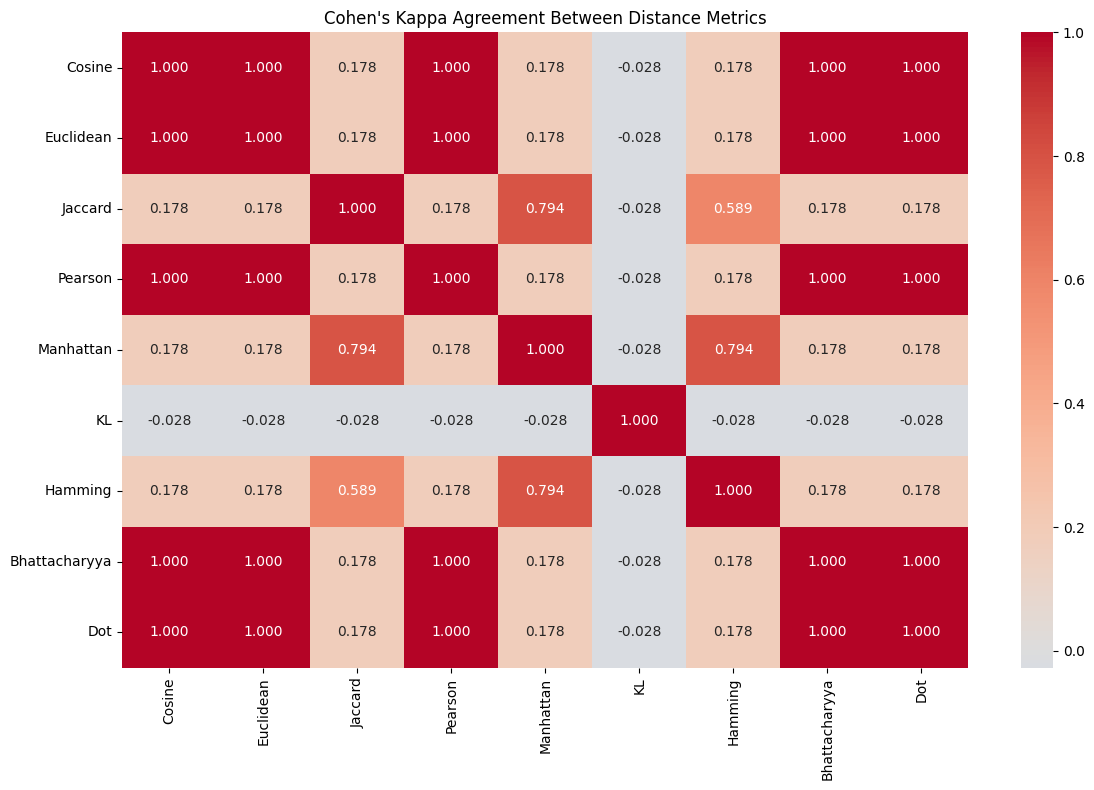

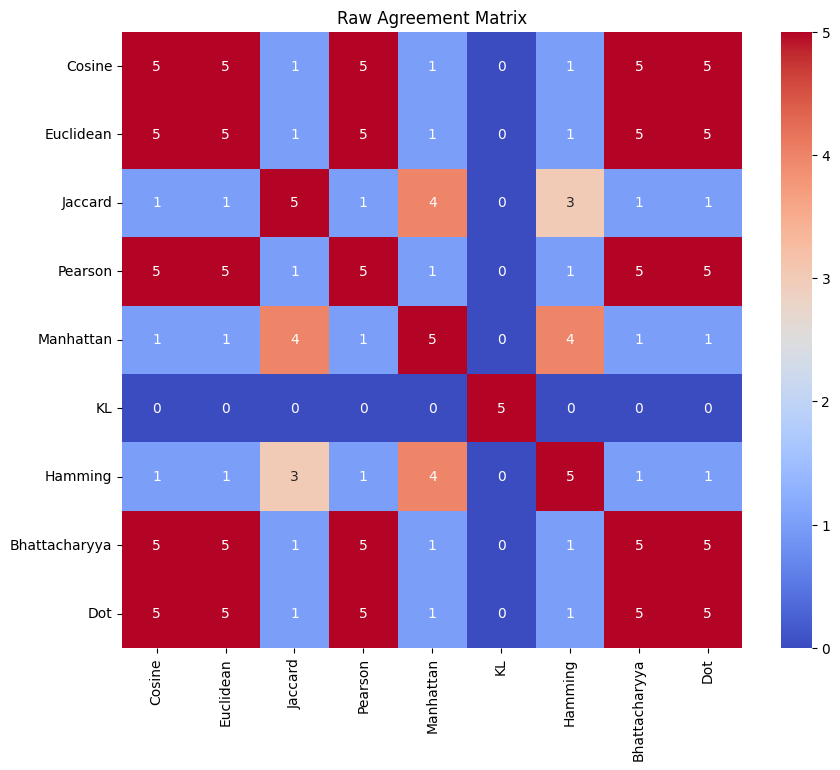

In [87]:
import random
for i in range (20):
    print(f"**************************{i+1}********************************")
    # Select 5 random words from words_list
    random_query_words = random.sample(words_list, 5)
    random_query_text = ' '.join(random_query_words)
    print(f"Random Query: {random_query_text}")
    # Transform the random query into a vector
    random_query_vector = vectorizer.transform([random_query_text]).toarray()
    compare_distances(random_query_vector, 5)

Divergence, hammer y Jaccard no

Similitud del Coseno no considera la longitud del vector